In [1]:
import gurobipy as gp
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re

In [2]:
# get input paths
test_set = "miplib_5000"
instance_fldr = os.path.join("instances", test_set)
test_set_fldr = os.path.join("test_sets", test_set)
results_fldr = os.path.join("results", test_set)
out_fldr = os.path.join("outputs", test_set)

# set filters
degrees = [-1, 1]
term_list = [4, 16, 64]
filter_cbc = False

## Check run failures

In [3]:
# running list of strings contained by different error codes
# last two are catchalls
err = {
    "walltime": [],
    "bad_alloc": [],
    "takeoffcuts": [],
    "solver is dual infeasible": [],
    "solver must be optimal": [],
    "segmentation fault": [],
    "no vpcs were made from a new disjunction": [],
    "farkas": [],
    "prlp is primal infeasible": [],  # put outstanding bugs below here
    "must have primalbound > root lp objective": [],
    "objective at parent node": [],
    "failed to optimize mip": [],
    "disjunction does not represent a full binary tree": [],
    "nonbasic reduced cost should be": [],
    "solver not proven optimal for node": [],
    "unable to open": [],
    "license": []
}

# read in cbc acceptable instances from cbc.txt
with open("cbc.txt", "r") as f:
    cbc_instances = f.read().split("\n")

# runs that errored out with new error code
other = []

# runs that had no errors
empty = []

# runs that only had warnings
warning = []

# series that didn't run
no_go = []

# track sizes of instances
rows, cols = {}, {}

# map the names
names = {}

# counts
count_series = 0
count_instances = 0

# iterate over all expected runs
for instance in os.listdir(test_set_fldr):
    if not os.path.isdir(os.path.join(test_set_fldr, instance)):
        continue
    # only look at cbc instances if we ran with cbc
    if instance not in cbc_instances and "gurobi" not in test_set and filter_cbc:
        continue
        
    # get the number of rows and columns in the instance
    mdl = gp.read(os.path.join(instance_fldr, f"{instance}.mps"))
    rows[instance] = mdl.NumConstrs
    cols[instance] = mdl.NumVars
        
    for perturbation in os.listdir(os.path.join(test_set_fldr, instance)):
        if not os.path.isdir(os.path.join(test_set_fldr, instance, perturbation)):
            continue
        # only look at perturbations that were run
        p, d = perturbation.split("_")
        if int(d) not in degrees:
            continue
        for terms in term_list:
            for generator in ["None", "New", "Old", "Farkas"]:

                # set variables for this iteration
                count_series += 1
                stem = f"{instance}_{perturbation}_{terms}_{generator}"
                file_pth = os.path.join(results_fldr, f"{stem}.err")
                series_fldr = os.path.join(test_set_fldr, instance, perturbation)
                count_instances += len([f for f in os.listdir(series_fldr) if
                                        f.endswith(".mps")])
                names[stem] = instance

                # check if the series wasn't run
                if not os.path.exists(file_pth):
                    no_go.append(stem)
                
                # check if the series ran with no errors or warnings
                elif os.path.getsize(file_pth) == 0:
                    empty.append(stem)
                
                # track which error codes were thrown
                else:
                    # read the file
                    with open(file_pth, "r") as f:
                        text = f.read().lower()
                    
                    # assign the error file to the appropriate list
                    found_code = False
                    for code in err:
                        if code in text:
                            err[code].append(stem)
                            found_code = True
                            break
                    if not found_code:
                        if "warning" in text:
                            warning.append(stem)
                        else:
                            other.append(stem)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-31
Read MPS format model from file instances/miplib_5000/bienst2.mps
Reading time = 0.00 seconds
bienst2: 576 rows, 505 columns, 2184 nonzeros
Read MPS format model from file instances/miplib_5000/set3-15.mps
Reading time = 0.00 seconds
set3-15: 3747 rows, 4019 columns, 13747 nonzeros
Read MPS format model from file instances/miplib_5000/diamond.mps
Reading time = 0.00 seconds
DIAMOND: 4 rows, 2 columns, 8 nonzeros
Read MPS format model from file instances/miplib_5000/f2gap801600.mps
Reading time = 0.00 seconds
f2gap801600: 80 rows, 1600 columns, 3200 nonzeros
Read MPS format model from file instances/miplib_5000/stein15inf.mps
Reading time = 0.00 seconds
stein15inf: 37 rows, 15 columns, 135 nonzeros
Read MPS format model from file instances/miplib_5000/neos-841664.mps
Reading time = 0.00 seconds
file: 3135 rows, 2925 columns, 10920 nonzeros
Read MPS format model from file instances/miplib_5000/neos

In [4]:
# check which series didn't run
print(no_go)

['bienst2_rhs_1_4_None', 'bienst2_rhs_1_4_New', 'bienst2_rhs_1_4_Old', 'bienst2_rhs_1_4_Farkas', 'bienst2_rhs_1_16_None', 'bienst2_rhs_1_16_New', 'bienst2_rhs_1_16_Old', 'bienst2_rhs_1_16_Farkas', 'bienst2_rhs_1_64_None', 'bienst2_rhs_1_64_New', 'bienst2_rhs_1_64_Old', 'bienst2_rhs_1_64_Farkas', 'bienst2_objective_1_4_None', 'bienst2_objective_1_4_New', 'bienst2_objective_1_4_Old', 'bienst2_objective_1_4_Farkas', 'bienst2_objective_1_16_None', 'bienst2_objective_1_16_New', 'bienst2_objective_1_16_Old', 'bienst2_objective_1_16_Farkas', 'bienst2_objective_1_64_None', 'bienst2_objective_1_64_New', 'bienst2_objective_1_64_Old', 'bienst2_objective_1_64_Farkas', 'bienst2_matrix_-1_4_None', 'bienst2_matrix_-1_4_New', 'bienst2_matrix_-1_4_Old', 'bienst2_matrix_-1_4_Farkas', 'bienst2_matrix_-1_16_None', 'bienst2_matrix_-1_16_New', 'bienst2_matrix_-1_16_Old', 'bienst2_matrix_-1_16_Farkas', 'bienst2_matrix_-1_64_None', 'bienst2_matrix_-1_64_New', 'bienst2_matrix_-1_64_Old', 'bienst2_matrix_-1_64_

In [5]:
# get the proportion of series that at least got started
1 - (len(no_go) / count_series)

0.0038437884378843545

In [6]:
# out of time - rerun with more time if a lot of these
print(err["walltime"])
len(err["walltime"]) / count_series

[]


0.0

In [7]:
# out of memory - rerun with more memory if a lot of these
print(err["bad_alloc"])
len(err["bad_alloc"]) / count_series

['set1al_rhs_-1_4_Old', '23588_matrix_1_4_New']


7.687576875768758e-05

In [8]:
# this is an issue with John's bookkeeping - not much we can do here
print(err["takeoffcuts"])
len(err["takeoffcuts"]) / count_series

[]


0.0

In [9]:
print(err["solver is dual infeasible"])
len(err["solver is dual infeasible"]) / count_series

[]


0.0

In [10]:
# these are usually issues with CLP finding optimality - not much we can do here
print(err["solver must be optimal"])
len(err["solver must be optimal"]) / count_series

[]


0.0

In [11]:
print(err["segmentation fault"])
len(err["segmentation fault"]) / count_series

['ci-s4_objective_1_16_New', 'neos-574665_bound_-1_64_Farkas', 'neos-803220_objective_-1_16_Old', 'traininstance6_matrix_-1_4_Old', 'modglob_objective_-1_64_Farkas', 'nexp-150-20-1-5_objective_1_4_Old', 'assign1-5-8_rhs_-1_64_Old', 'assign1-5-8_bound_-1_64_Farkas', 'mik-250-20-75-1_rhs_-1_16_Old', 'r50x360_objective_-1_16_New', 'bell3b_objective_-1_4_New', 'aligninq_objective_1_64_New', 'gsvm2rl3_objective_1_16_Farkas', 'neos-862348_objective_-1_16_New', 'pp08aCUTS_rhs_-1_16_Old', 'cov1075_objective_1_16_Farkas', 'cracpb1_matrix_1_64_New', 'set1al_rhs_1_16_Farkas', 'ran14x18_1_objective_-1_16_New', 'neos-831188_objective_-1_16_Old', 'bppc8-02_objective_-1_16_Old', 'n6-3_matrix_-1_64_Farkas', 'neos-911970_bound_-1_16_Old', 'neos-933815_objective_1_64_Farkas', 'neos-1053234_objective_-1_64_Farkas', 'rocI-4-11_objective_1_16_Old', 'neos-547911_objective_-1_16_Farkas', 'p200x1188c_matrix_1_4_Old', '23588_rhs_-1_16_Farkas', 'k16x240b_matrix_1_64_New', 'neos1_rhs_1_64_New', 'neos1_matrix_1_1

0.0013068880688806889

In [12]:
# these should all be from the problem being too big and hitting the time limit or integer solutions
print(err["no vpcs were made from a new disjunction"])
missing_4_term = [n for n in err["no vpcs were made from a new disjunction"] if "_4_" in n]
missing_64_term = [n for n in err["no vpcs were made from a new disjunction"] if "_64_" in n]
missing_16_term = [n for n in err["no vpcs were made from a new disjunction"] if "_16_" in n]
print(f'4 term: {len(missing_4_term) / count_series}')
print(f'64 term: {len(missing_64_term) / count_series}')
print(f'16 term: {len(missing_16_term) / count_series}')

['f2gap40400_objective_1_4_Farkas', 'f2gap40400_objective_-1_64_Farkas', 'supportcase16_objective_-1_16_Old', 'misc06_rhs_1_64_Old', 'nug08_bound_1_16_Old']
4 term: 3.843788437884379e-05
64 term: 7.687576875768758e-05
16 term: 7.687576875768758e-05


In [13]:
vpc_err = {
    "CglVPC: Finishing with exit reason: PRLP_TIME_LIMIT": [],
    "CglVPC: Finishing with exit reason: TIME_LIMIT": [],
    "CglVPC: Finishing with exit reason: NO_CUTS_LIKELY": [],
    "CglVPC: Finishing with exit reason: PRLP_INFEASIBLE": [],
    "CglVPC: Finishing with exit reason: SUCCESS": [],
    "CglVPC: Finishing with exit reason: OPTIMAL_SOLUTION_FOUND": [],
    "CglVPC: Finishing with exit reason: FAIL_LIMIT": [],
    "CglVPC: Finishing with exit reason: NO_DISJUNCTION": [],
}

vpc_other = []

for stem in err["no vpcs were made from a new disjunction"]:
    file_pth = os.path.join(results_fldr, f"{stem}.out")

    with open(file_pth, "r") as f:
        text = f.read()
    
    # assign the error file to the appropriate list
    found_code = False
    for code in vpc_err:
        if code in text:
            vpc_err[code].append(stem)
            found_code = True
            break
    if not found_code:
        vpc_other.append(stem)

In [14]:
print(vpc_err["CglVPC: Finishing with exit reason: PRLP_TIME_LIMIT"])
len(vpc_err["CglVPC: Finishing with exit reason: PRLP_TIME_LIMIT"]) / len(err["no vpcs were made from a new disjunction"])

['bienst2_rhs_1_64_New', 'bienst2_rhs_1_64_Old', 'bienst2_rhs_1_64_Farkas', 'bienst2_objective_1_64_New', 'bienst2_objective_1_64_Old', 'bienst2_objective_1_64_Farkas', 'bienst2_matrix_-1_64_New', 'bienst2_matrix_-1_64_Old', 'bienst2_matrix_-1_64_Farkas', 'bienst2_objective_-1_64_New', 'bienst2_objective_-1_64_Old', 'bienst2_objective_-1_64_Farkas', 'f2gap801600_objective_1_64_New', 'f2gap801600_objective_1_64_Old', 'f2gap801600_objective_1_64_Farkas', 'f2gap801600_rhs_-1_64_New', 'f2gap801600_rhs_-1_64_Old', 'f2gap801600_rhs_-1_64_Farkas', 'f2gap801600_objective_-1_64_New', 'f2gap801600_objective_-1_64_Old', 'f2gap801600_objective_-1_64_Farkas', 'f2gap801600_bound_1_64_New', 'f2gap801600_bound_1_64_Old', 'f2gap801600_bound_1_64_Farkas', 'neos-841664_rhs_1_16_New', 'neos-841664_rhs_1_16_Old', 'neos-841664_rhs_1_16_Farkas', 'neos-841664_rhs_1_64_New', 'neos-841664_rhs_1_64_Old', 'neos-841664_rhs_1_64_Farkas', 'neos-841664_objective_1_16_New', 'neos-841664_objective_1_16_Old', 'neos-8416

0.4170019467878001

In [15]:
print(vpc_err["CglVPC: Finishing with exit reason: TIME_LIMIT"])
len(vpc_err["CglVPC: Finishing with exit reason: TIME_LIMIT"]) / len(err["no vpcs were made from a new disjunction"])

['lrn_objective_1_64_New', 'lrn_objective_1_64_Old', 'lrn_objective_1_64_Farkas', 'lrn_objective_-1_64_New', 'lrn_objective_-1_64_Old', 'lrn_objective_-1_64_Farkas', 'lrn_bound_1_64_New', 'lrn_bound_1_64_Old', 'lrn_bound_1_64_Farkas', 'mappingmesh3x3mpeg2i_objective_1_64_New', 'mappingmesh3x3mpeg2i_objective_1_64_Old', 'mappingmesh3x3mpeg2i_objective_1_64_Farkas', 'mappingmesh3x3mpeg2i_objective_-1_64_New', 'mappingmesh3x3mpeg2i_objective_-1_64_Old', 'mappingmesh3x3mpeg2i_objective_-1_64_Farkas', 'neos-691058_rhs_1_64_New', 'neos-691058_rhs_1_64_Old', 'neos-691058_rhs_1_64_Farkas', 'neos-691058_objective_1_64_New', 'neos-691058_objective_1_64_Old', 'neos-691058_objective_1_64_Farkas', 'neos-691058_matrix_1_64_New', 'neos-691058_matrix_1_64_Old', 'neos-691058_matrix_1_64_Farkas', 'neos-691058_matrix_-1_64_New', 'neos-691058_matrix_-1_64_Old', 'neos-691058_matrix_-1_64_Farkas', 'neos-691058_objective_-1_64_New', 'neos-691058_objective_-1_64_Old', 'neos-691058_objective_-1_64_Farkas', 'ne

0.06683971447112265

In [16]:
print(vpc_err["CglVPC: Finishing with exit reason: NO_CUTS_LIKELY"])
len(vpc_err["CglVPC: Finishing with exit reason: NO_CUTS_LIKELY"]) / len(err["no vpcs were made from a new disjunction"])

['neos-555343_rhs_1_4_New', 'neos-555343_rhs_1_4_Old', 'neos-555343_rhs_1_4_Farkas', 'neos-555343_objective_1_4_New', 'neos-555343_objective_1_4_Old', 'neos-555343_objective_1_4_Farkas', 'neos-555343_matrix_1_4_New', 'neos-555343_matrix_1_4_Old', 'neos-555343_matrix_1_4_Farkas', 'neos-555343_bound_1_4_New', 'neos-555343_bound_1_4_Old', 'neos-555343_bound_1_4_Farkas', 'pigeon-20_rhs_1_4_New', 'pigeon-20_rhs_1_4_Old', 'pigeon-20_rhs_1_4_Farkas', 'pigeon-20_objective_1_4_New', 'pigeon-20_objective_1_4_Old', 'pigeon-20_objective_1_4_Farkas', 'pigeon-20_matrix_1_4_New', 'pigeon-20_matrix_1_4_Old', 'pigeon-20_matrix_1_4_Farkas', 'pigeon-20_rhs_-1_4_New', 'pigeon-20_rhs_-1_4_Old', 'pigeon-20_rhs_-1_4_Farkas', 'pigeon-20_bound_-1_4_New', 'pigeon-20_bound_-1_4_Old', 'pigeon-20_bound_-1_4_Farkas', 'pigeon-20_matrix_-1_4_New', 'pigeon-20_matrix_-1_4_Old', 'pigeon-20_matrix_-1_4_Farkas', 'pigeon-20_objective_-1_4_New', 'pigeon-20_objective_-1_4_Old', 'pigeon-20_objective_-1_4_Farkas', 'pigeon-20_b

0.30330953926022064

In [17]:
print(vpc_err["CglVPC: Finishing with exit reason: PRLP_INFEASIBLE"])
len(vpc_err["CglVPC: Finishing with exit reason: PRLP_INFEASIBLE"]) / len(err["no vpcs were made from a new disjunction"])

['neos-555343_rhs_1_16_New', 'neos-555343_rhs_1_16_Old', 'neos-555343_rhs_1_16_Farkas', 'neos-555343_objective_1_16_New', 'neos-555343_objective_1_16_Old', 'neos-555343_objective_1_16_Farkas', 'neos-555343_matrix_1_16_New', 'neos-555343_matrix_1_16_Old', 'neos-555343_matrix_1_16_Farkas', 'neos-555343_bound_1_16_New', 'neos-555343_bound_1_16_Old', 'neos-555343_bound_1_16_Farkas', 'neos-555343_bound_1_64_Old', 'pigeon-20_rhs_1_16_New', 'pigeon-20_rhs_1_16_Old', 'pigeon-20_rhs_1_16_Farkas', 'pigeon-20_rhs_1_64_New', 'pigeon-20_rhs_1_64_Old', 'pigeon-20_rhs_1_64_Farkas', 'pigeon-20_objective_1_16_New', 'pigeon-20_objective_1_16_Old', 'pigeon-20_objective_1_16_Farkas', 'pigeon-20_objective_1_64_New', 'pigeon-20_objective_1_64_Old', 'pigeon-20_objective_1_64_Farkas', 'pigeon-20_matrix_1_16_New', 'pigeon-20_matrix_1_16_Old', 'pigeon-20_matrix_1_16_Farkas', 'pigeon-20_matrix_1_64_New', 'pigeon-20_matrix_1_64_Old', 'pigeon-20_matrix_1_64_Farkas', 'pigeon-20_rhs_-1_16_New', 'pigeon-20_rhs_-1_16_

0.08500973393900065

In [18]:
print(vpc_err["CglVPC: Finishing with exit reason: SUCCESS"])
len(vpc_err["CglVPC: Finishing with exit reason: SUCCESS"]) / len(err["no vpcs were made from a new disjunction"])

['mine-90-10_objective_1_4_New', 'mine-90-10_objective_1_4_Old', 'mine-90-10_objective_1_4_Farkas', 'mine-90-10_matrix_1_4_New', 'mine-90-10_matrix_1_4_Old', 'mine-90-10_matrix_1_4_Farkas', 'mine-90-10_matrix_-1_4_New', 'mine-90-10_matrix_-1_4_Old', 'mine-90-10_matrix_-1_4_Farkas', 'mine-90-10_objective_-1_4_New', 'mine-90-10_objective_-1_4_Old', 'mine-90-10_objective_-1_4_Farkas', 'a1c1s1_rhs_1_16_New', 'a1c1s1_rhs_1_16_Old', 'a1c1s1_rhs_1_16_Farkas', 'a1c1s1_objective_1_16_New', 'a1c1s1_objective_1_16_Old', 'a1c1s1_objective_1_16_Farkas', 'a1c1s1_rhs_-1_16_New', 'a1c1s1_rhs_-1_16_Old', 'a1c1s1_rhs_-1_16_Farkas', 'a1c1s1_matrix_-1_16_New', 'a1c1s1_matrix_-1_16_Old', 'a1c1s1_matrix_-1_16_Farkas', 'a1c1s1_objective_-1_16_New', 'a1c1s1_objective_-1_16_Old', 'a1c1s1_objective_-1_16_Farkas', 'neos-1112787_rhs_1_4_New', 'neos-1112787_rhs_1_4_Old', 'neos-1112787_rhs_1_4_Farkas', 'neos-1112787_rhs_1_16_New', 'neos-1112787_rhs_1_16_Old', 'neos-1112787_rhs_1_16_Farkas', 'neos-1112787_objective_

0.016482803374432187

In [19]:
print(vpc_err["CglVPC: Finishing with exit reason: OPTIMAL_SOLUTION_FOUND"])
len(vpc_err["CglVPC: Finishing with exit reason: OPTIMAL_SOLUTION_FOUND"]) / len(err["no vpcs were made from a new disjunction"])

['rlp2_rhs_1_4_New', 'rlp2_rhs_1_4_Old', 'rlp2_rhs_1_4_Farkas', 'rlp2_rhs_1_16_New', 'rlp2_rhs_1_16_Old', 'rlp2_rhs_1_16_Farkas', 'rlp2_rhs_1_64_New', 'rlp2_rhs_1_64_Old', 'rlp2_rhs_1_64_Farkas', 'rlp2_objective_1_4_New', 'rlp2_objective_1_4_Old', 'rlp2_objective_1_4_Farkas', 'rlp2_objective_1_16_New', 'rlp2_objective_1_16_Old', 'rlp2_objective_1_16_Farkas', 'rlp2_objective_1_64_New', 'rlp2_objective_1_64_Old', 'rlp2_objective_1_64_Farkas', 'rlp2_matrix_1_4_New', 'rlp2_matrix_1_4_Old', 'rlp2_matrix_1_4_Farkas', 'rlp2_matrix_1_16_New', 'rlp2_matrix_1_16_Old', 'rlp2_matrix_1_16_Farkas', 'rlp2_matrix_1_64_New', 'rlp2_matrix_1_64_Old', 'rlp2_matrix_1_64_Farkas', 'rlp2_objective_-1_4_New', 'rlp2_objective_-1_4_Old', 'rlp2_objective_-1_4_Farkas', 'rlp2_objective_-1_16_New', 'rlp2_objective_-1_16_Old', 'rlp2_objective_-1_16_Farkas', 'rlp2_objective_-1_64_New', 'rlp2_objective_-1_64_Old', 'rlp2_objective_-1_64_Farkas', 'tanglegram6_objective_1_16_New', 'tanglegram6_objective_1_16_Old', 'tangle

0.07319922128487995

In [20]:
print(vpc_err["CglVPC: Finishing with exit reason: FAIL_LIMIT"])
len(vpc_err["CglVPC: Finishing with exit reason: FAIL_LIMIT"]) / len(err["no vpcs were made from a new disjunction"])

['lrn_objective_1_4_New', 'lrn_objective_1_4_Old', 'lrn_objective_1_4_Farkas', 'lrn_objective_-1_4_New', 'lrn_objective_-1_4_Old', 'lrn_objective_-1_4_Farkas', 'lrn_bound_1_4_New', 'lrn_bound_1_4_Old', 'lrn_bound_1_4_Farkas', 'neos-1112787_objective_1_16_Old', 'neos-1112787_objective_-1_16_Farkas', 'neos-1112787_bound_1_16_Old', 'neos-3734794-moppy_objective_1_16_New', 'neos-3734794-moppy_objective_1_16_Old', 'neos-3734794-moppy_objective_1_16_Farkas', 'neos-3734794-moppy_matrix_1_16_New', 'neos-3734794-moppy_matrix_1_16_Old', 'neos-3734794-moppy_matrix_1_16_Farkas', 'neos-3734794-moppy_matrix_-1_16_New', 'neos-3734794-moppy_matrix_-1_16_Old', 'neos-3734794-moppy_matrix_-1_16_Farkas', 'neos-3734794-moppy_objective_-1_16_New', 'neos-3734794-moppy_objective_-1_16_Old', 'neos-3734794-moppy_objective_-1_16_Farkas', 'neos-3734794-moppy_bound_1_16_New', 'neos-3734794-moppy_bound_1_16_Old', 'neos-3734794-moppy_bound_1_16_Farkas', 'milo-v12-6-r2-40-1_objective_1_4_New', 'milo-v12-6-r2-40-1_obj

0.010123296560674887

In [21]:
print(vpc_err["CglVPC: Finishing with exit reason: NO_DISJUNCTION"])
len(vpc_err["CglVPC: Finishing with exit reason: NO_DISJUNCTION"]) / len(err["no vpcs were made from a new disjunction"])

['neos-3696678-lyvia_rhs_1_4_New', 'neos-3696678-lyvia_rhs_1_4_Old', 'neos-3696678-lyvia_rhs_1_4_Farkas', 'neos-3696678-lyvia_rhs_1_16_New', 'neos-3696678-lyvia_rhs_1_16_Old', 'neos-3696678-lyvia_rhs_1_16_Farkas', 'neos-3696678-lyvia_rhs_1_64_New', 'neos-3696678-lyvia_rhs_1_64_Old', 'neos-3696678-lyvia_rhs_1_64_Farkas', 'neos-3696678-lyvia_objective_1_4_New', 'neos-3696678-lyvia_objective_1_4_Old', 'neos-3696678-lyvia_objective_1_4_Farkas', 'neos-3696678-lyvia_objective_1_16_New', 'neos-3696678-lyvia_objective_1_16_Old', 'neos-3696678-lyvia_objective_1_16_Farkas', 'neos-3696678-lyvia_objective_1_64_New', 'neos-3696678-lyvia_objective_1_64_Old', 'neos-3696678-lyvia_objective_1_64_Farkas', 'neos-3696678-lyvia_rhs_-1_4_New', 'neos-3696678-lyvia_rhs_-1_4_Old', 'neos-3696678-lyvia_rhs_-1_4_Farkas', 'neos-3696678-lyvia_rhs_-1_16_New', 'neos-3696678-lyvia_rhs_-1_16_Old', 'neos-3696678-lyvia_rhs_-1_16_Farkas', 'neos-3696678-lyvia_rhs_-1_64_New', 'neos-3696678-lyvia_rhs_-1_64_Old', 'neos-369667

0.028033744321868916

In [22]:
vpc_other

[]

In [23]:
# get breakdown of why vpc generation failed - mostly from lack of provisioning
for code, exps in vpc_err.items():
    print(f"{code}: {len(exps) / len(err['no vpcs were made from a new disjunction'])}")

print(f"other: {len(vpc_other) / len(err['no vpcs were made from a new disjunction'])}")

CglVPC: Finishing with exit reason: PRLP_TIME_LIMIT: 0.4170019467878001
CglVPC: Finishing with exit reason: TIME_LIMIT: 0.06683971447112265
CglVPC: Finishing with exit reason: NO_CUTS_LIKELY: 0.30330953926022064
CglVPC: Finishing with exit reason: PRLP_INFEASIBLE: 0.08500973393900065
CglVPC: Finishing with exit reason: SUCCESS: 0.016482803374432187
CglVPC: Finishing with exit reason: OPTIMAL_SOLUTION_FOUND: 0.07319922128487995
CglVPC: Finishing with exit reason: FAIL_LIMIT: 0.010123296560674887
CglVPC: Finishing with exit reason: NO_DISJUNCTION: 0.028033744321868916
other: 0.0


In [24]:
# this may be a bug in my code - track down if a lot
print(err["farkas"])
len(err["farkas"]) / count_series

['bienst2_matrix_-1_4_New', 'f2gap801600_objective_1_16_New', 'f2gap801600_objective_1_16_Old', 'f2gap801600_objective_1_16_Farkas', 'f2gap801600_rhs_-1_16_New', 'f2gap801600_rhs_-1_16_Old', 'f2gap801600_rhs_-1_16_Farkas', 'f2gap801600_objective_-1_16_New', 'f2gap801600_objective_-1_16_Old', 'f2gap801600_objective_-1_16_Farkas', 'f2gap801600_bound_1_16_New', 'f2gap801600_bound_1_16_Old', 'f2gap801600_bound_1_16_Farkas', 'neos-3610173-itata_objective_1_16_New', '10teams_objective_1_4_New', '10teams_objective_-1_4_New', 'gmu-35-40_objective_1_4_New', 'gmu-35-40_objective_1_16_New', 'gmu-35-40_objective_1_64_New', 'gmu-35-40_objective_1_64_Old', 'gmu-35-40_objective_1_64_Farkas', 'gmu-35-40_matrix_-1_64_New', 'gmu-35-40_matrix_-1_64_Old', 'gmu-35-40_matrix_-1_64_Farkas', 'gmu-35-40_objective_-1_4_New', 'gmu-35-40_objective_-1_16_New', 'gmu-35-40_objective_-1_64_New', 'gmu-35-40_objective_-1_64_Old', 'gmu-35-40_objective_-1_64_Farkas', 'ci-s4_objective_1_64_New', 'ci-s4_objective_-1_64_New

0.04312730627306273

In [25]:
# this shouldn't be an issue - effected runs just get skipped
print(err["prlp is primal infeasible"])
len(err["prlp is primal infeasible"]) / count_series

['f2gap801600_objective_1_4_Old', 'neos-841664_objective_1_4_Old', 'neos-841664_matrix_1_4_Old', 'neos-841664_objective_-1_4_Old', 'neos-3610173-itata_objective_1_4_Old', 'neos-3610173-itata_objective_1_16_Old', 'neos-3610173-itata_objective_-1_4_Old', 'neos-3610173-itata_objective_-1_64_Old', '10teams_objective_1_4_Old', 'gmu-35-40_objective_1_4_Old', 'gmu-35-40_objective_1_16_Old', 'gmu-35-40_matrix_-1_4_Old', 'gmu-35-40_matrix_-1_16_Old', 'gmu-35-40_objective_-1_4_Old', 'gmu-35-40_objective_-1_16_Old', 'neos-3610051-istra_objective_1_4_Old', 'neos-3610051-istra_rhs_-1_4_Old', 'neos-3610051-istra_matrix_-1_4_Old', 'neos-3610051-istra_matrix_-1_16_Old', 'neos-3610051-istra_objective_-1_16_New', 'neos-3610051-istra_objective_-1_64_New', 'neos-3610051-istra_objective_-1_64_Old', 'neos-593853_matrix_1_4_Old', 'neos-593853_matrix_1_16_Old', 'neos-593853_matrix_1_64_Old', 'neos-593853_matrix_-1_4_Old', 'neos-593853_matrix_-1_16_Old', 'neos-593853_matrix_-1_64_Old', 'macrophage_objective_1_

0.022101783517835177

In [26]:
print(warning)
len(warning) / count_series

['bienst2_rhs_1_16_Old', 'bienst2_objective_1_16_New', 'bienst2_objective_1_16_Old', 'bienst2_matrix_-1_16_New', 'bienst2_matrix_-1_16_Old', 'bienst2_objective_-1_16_New', 'bienst2_objective_-1_16_Old', 'neos-841664_rhs_1_4_New', 'neos-841664_matrix_1_4_New', 'neos-841664_rhs_-1_4_New', 'neos-841664_matrix_-1_4_New', 'neos-841664_matrix_-1_4_Old', '10teams_matrix_1_4_Old', '10teams_objective_-1_4_Old', 'gmu-35-40_matrix_-1_16_New', 'ci-s4_objective_1_16_Old', 'neos-892255_rhs_1_4_Old', 'neos-892255_objective_-1_4_Old', 'neos-912023_rhs_1_4_Old', 'neos-912023_objective_1_4_Old', 'neos-912023_objective_-1_4_Old', 'neos-593853_objective_1_4_New', 'neos-593853_objective_1_4_Old', 'neos-593853_objective_1_4_Farkas', 'neos-593853_objective_1_16_Old', 'neos-593853_objective_1_16_Farkas', 'neos-593853_matrix_1_4_New', 'neos-593853_matrix_1_4_Farkas', 'neos-593853_matrix_1_16_New', 'neos-593853_matrix_1_16_Farkas', 'neos-593853_matrix_1_64_New', 'neos-593853_matrix_1_64_Farkas', 'neos-593853_rh

0.021217712177121772

In [27]:
# issue was not optimizing solver before checking LP relaxation objective vs primal bound
print(err["must have primalbound > root lp objective"])
len(err["must have primalbound > root lp objective"]) / count_series

['neos-1171737_matrix_1_4_None', 'neos-1171737_matrix_1_16_None', 'neos-1171737_matrix_1_64_None', 'neos-1171737_bound_1_4_None', 'neos-1171737_bound_1_16_None', 'neos-1171737_bound_1_64_None', 'neos-1215891_bound_1_4_None', 'neos-1215891_bound_1_16_None', 'neos-1215891_bound_1_64_None', 'neos-912015_objective_1_4_None', 'neos-912015_objective_1_16_None', 'neos-912015_objective_1_64_None', 'neos-912015_matrix_1_4_None', 'neos-912015_matrix_1_16_None', 'neos-912015_matrix_1_64_None', 'neos-912015_objective_-1_4_None', 'neos-912015_objective_-1_16_None', 'neos-912015_objective_-1_64_None', 'peg-solitaire-a3_rhs_1_4_None', 'peg-solitaire-a3_rhs_1_4_New', 'peg-solitaire-a3_rhs_1_4_Old', 'peg-solitaire-a3_rhs_1_4_Farkas', 'peg-solitaire-a3_rhs_1_16_None', 'peg-solitaire-a3_rhs_1_16_New', 'peg-solitaire-a3_rhs_1_16_Old', 'peg-solitaire-a3_rhs_1_16_Farkas', 'peg-solitaire-a3_rhs_1_64_None', 'peg-solitaire-a3_rhs_1_64_New', 'peg-solitaire-a3_rhs_1_64_Old', 'peg-solitaire-a3_rhs_1_64_Farkas', '

0.022486162361623617

In [28]:
# LP relxation objective is not going to match root node objective when warm starting 
print(err["objective at parent node"])
len(err["objective at parent node"]) / count_series

[]


0.0

In [29]:
# not enough tolerance added to bound (or we hit time limit)
# todo handle this gracefully
print(err["failed to optimize mip"])
len(err["failed to optimize mip"]) / count_series

['neos-803219_matrix_1_16_Farkas', 'markshare_4_0_matrix_1_4_None', 'markshare_4_0_matrix_1_16_None', 'markshare_4_0_matrix_1_64_None']


0.00015375153751537516

In [30]:
# todo: figure out why
print(err["disjunction does not represent a full binary tree"])
len(err["disjunction does not represent a full binary tree"]) / count_series

['neos-3610173-itata_rhs_-1_16_New', 'neos-3610173-itata_rhs_-1_64_New', 'neos-3610173-itata_matrix_-1_16_New', 'neos-3610173-itata_matrix_-1_64_New', 'neos-3610051-istra_rhs_-1_64_New', 'neos-3610051-istra_matrix_-1_4_New', 'neos-3610051-istra_matrix_-1_16_New', 'neos-3610051-istra_matrix_-1_64_New', 'neos-3046601-motu_matrix_1_4_New', 'neos-3046601-motu_matrix_1_16_New', 'neos-3046601-motu_matrix_1_64_New', 'neos-3046601-motu_matrix_-1_16_New', 'neos-3046601-motu_matrix_-1_64_New', 'neos-574665_rhs_-1_64_New', 'neos-574665_matrix_-1_16_New', 'neos-574665_matrix_-1_64_New', 'csched007_matrix_-1_16_New', 'graphdraw-domain_rhs_1_16_New', 'graphdraw-domain_matrix_1_16_New', 'blend2_matrix_-1_16_New', 'blend2_matrix_-1_64_New', 'traininstance6_rhs_-1_16_New', 'traininstance6_matrix_-1_16_New', 'neos-3611447-jijia_rhs_1_64_New', 'neos-3611447-jijia_matrix_1_16_New', 'neos-3611447-jijia_matrix_1_64_New', 'neos-3611447-jijia_matrix_-1_16_New', 'neos-3611447-jijia_matrix_-1_64_New', 'neos-505

0.005265990159901599

In [31]:
# this and next issue I think are because we run out of time creating tree leading to errors
# todo: handle gracefully 
print(err["nonbasic reduced cost should be"])
len(err["nonbasic reduced cost should be"]) / count_series

['gmu-35-40_objective_1_4_Farkas', 'gmu-35-40_matrix_-1_4_New', 'gmu-35-40_matrix_-1_4_Farkas', 'gmu-35-40_objective_-1_4_Farkas', 'timtab1CUTS_objective_-1_64_Old', 'neos-1480121_objective_-1_4_New', 'bc1_rhs_1_4_New', 'bc1_rhs_1_4_Old', 'bc1_rhs_1_4_Farkas', 'bc1_rhs_1_16_New', 'bc1_rhs_1_16_Old', 'bc1_rhs_1_16_Farkas', 'bc1_rhs_1_64_New', 'bc1_rhs_1_64_Old', 'bc1_rhs_1_64_Farkas', 'bc1_objective_1_4_New', 'bc1_objective_1_4_Old', 'bc1_objective_1_4_Farkas', 'bc1_objective_1_16_New', 'bc1_objective_1_16_Old', 'bc1_objective_1_16_Farkas', 'bc1_objective_1_64_New', 'bc1_objective_1_64_Old', 'bc1_objective_1_64_Farkas', 'bc1_matrix_1_4_New', 'bc1_matrix_1_4_Old', 'bc1_matrix_1_4_Farkas', 'bc1_matrix_1_16_New', 'bc1_matrix_1_16_Old', 'bc1_matrix_1_16_Farkas', 'bc1_matrix_1_64_New', 'bc1_matrix_1_64_Old', 'bc1_matrix_1_64_Farkas', 'bc1_matrix_-1_4_New', 'bc1_matrix_-1_4_Old', 'bc1_matrix_-1_4_Farkas', 'bc1_matrix_-1_16_New', 'bc1_matrix_-1_16_Old', 'bc1_matrix_-1_16_Farkas', 'bc1_matrix_-

0.008148831488314884

In [32]:
# again issue with not getting through vpc generation in time
# todo: handle this gracefully
print(err["solver not proven optimal for node"])
len(err["solver not proven optimal for node"]) / count_series

['neos-848845_rhs_1_16_New', 'neos-848845_rhs_1_16_Old', 'neos-848845_rhs_1_16_Farkas', 'neos-848845_rhs_1_64_New', 'neos-848845_rhs_1_64_Old', 'neos-848845_rhs_1_64_Farkas', 'neos-848845_matrix_1_16_New', 'neos-848845_matrix_1_16_Old', 'neos-848845_matrix_1_16_Farkas', 'neos-848845_matrix_1_64_New', 'neos-848845_matrix_1_64_Old', 'neos-848845_matrix_1_64_Farkas', 'neos-848845_matrix_-1_16_New', 'neos-848845_matrix_-1_16_Old', 'neos-848845_matrix_-1_16_Farkas', 'neos-848845_matrix_-1_64_New', 'neos-848845_matrix_-1_64_Old', 'neos-848845_matrix_-1_64_Farkas', 'neos-848845_bound_1_16_New', 'neos-848845_bound_1_16_Old', 'neos-848845_bound_1_16_Farkas', 'neos-848845_bound_1_64_New', 'neos-848845_bound_1_64_Old', 'neos-848845_bound_1_64_Farkas', 'neos-849702_rhs_1_16_New', 'neos-849702_rhs_1_16_Old', 'neos-849702_rhs_1_16_Farkas', 'neos-849702_rhs_1_64_New', 'neos-849702_rhs_1_64_Old', 'neos-849702_rhs_1_64_Farkas', 'neos-849702_matrix_1_16_Farkas', 'neos-849702_matrix_1_64_New', 'neos-8497

0.0017297047970479705

In [33]:
print(err["unable to open"])
len(err["unable to open"]) / count_series

['tanglegram1_objective_1_16_New', 'mas74_rhs_1_16_Old', 'mas74_objective_1_4_Farkas', 'mas74_objective_1_64_None', 'mas74_matrix_-1_16_New', 'mas74_matrix_-1_16_Old', 'neos-565815_matrix_1_64_Farkas', 'prod2_matrix_1_4_Farkas', 'ns1606230_objective_-1_16_None', 'mc11_rhs_-1_64_Farkas', '50v-10_objective_1_4_Farkas', '50v-10_objective_1_16_None', '50v-10_matrix_1_64_None']


0.0004996924969249692

In [34]:
print(err["license"])
len(err["license"]) / count_series

[]


0.0

In [35]:
# errors unaccounted for
print(other)
len(other) / count_series

['gmu-35-40_objective_-1_16_Farkas', 'nu25-pr12_matrix_-1_64_Farkas', 'neos-803220_rhs_-1_64_New', 'neos-1480121_objective_1_64_New', 'neos-1480121_objective_-1_16_New', 'traininstance6_objective_1_16_Old', 'traininstance6_rhs_-1_16_Old', 'traininstance6_matrix_-1_16_Old', 'traininstance6_objective_-1_16_New', 'traininstance6_objective_-1_16_Old', 'neos-803219_objective_1_64_New', 'neos-803219_objective_1_64_Old', 'neos-803219_objective_1_64_Farkas', 'neos-803219_matrix_1_16_New', 'neos-803219_matrix_1_64_New', 'neos-803219_matrix_1_64_Old', 'neos-803219_matrix_1_64_Farkas', 'neos-803219_rhs_-1_64_New', 'neos-803219_rhs_-1_64_Old', 'neos-803219_rhs_-1_64_Farkas', 'neos-803219_matrix_-1_64_New', 'neos-803219_matrix_-1_64_Old', 'neos-803219_matrix_-1_64_Farkas', 'neos-803219_objective_-1_64_New', 'neos-803219_objective_-1_64_Old', 'neos-803219_objective_-1_64_Farkas', 'tanglegram1_objective_1_16_Farkas', 'tanglegram1_objective_-1_16_Old', 'tanglegram1_objective_-1_16_Farkas', 'neos-13961

0.006034747847478475

In [36]:
# proportion of series that were improperly provisioned
(len(err["bad_alloc"] + err["walltime"])) / count_series

0.04247386223862239

In [37]:
# get breakdown of errors
for code, exps in err.items():
    print(f"{code}: {len(exps) / count_series}")

print(f"other: {len(other) / count_series}")

print(f"warning: {len(warning) / count_series}")

print(f"no errors/warnings: {len(empty) / count_series}")

walltime: 0.0025753382533825336
bad_alloc: 0.03989852398523985
takeoffcuts: 0.0
solver is dual infeasible: 0.0
solver must be optimal: 0.01898831488314883
segmentation fault: 0.01845018450184502
no vpcs were made from a new disjunction: 0.2961638991389914
farkas: 0.04312730627306273
prlp is primal infeasible: 0.022101783517835177
must have primalbound > root lp objective: 0.022486162361623617
objective at parent node: 0.0
failed to optimize mip: 0.00015375153751537516
disjunction does not represent a full binary tree: 0.005265990159901599
nonbasic reduced cost should be: 0.008148831488314884
solver not proven optimal for node: 0.0017297047970479705
unable to open: 0.0004996924969249692
license: 0.0
other: 0.006034747847478475
no errors/warnings: 0.4913130381303813


## Read in data

In [38]:
# map generator names to the corresponding data frames
df_map = {
    "None": pd.DataFrame(),
    "Farkas": pd.DataFrame(),
    "New": pd.DataFrame(),
    "Old": pd.DataFrame()
}
gap_map = {
    "None": pd.DataFrame(),
    "Farkas": pd.DataFrame(),
    "New": pd.DataFrame(),
    "Old": pd.DataFrame()
}
regex = re.compile(r'([a-zA-Z0-9-]+(?:_o)?)_([a-z]+)_([0-9-]+)_([0-9]+)_([a-zA-Z ]+)')

# declaring types as needed
column_types = {
    "lpBound": float,
    "lpBoundPostVpc": float,
    "disjunctiveDualBound": float,
    "primalBound": float,
    "rootDualBound": float,
    "dualBound": float
}

# iterate over all files in the folder
for file_name in os.listdir(results_fldr):
    
    file_pth = os.path.join(results_fldr, file_name)
    
    # if the file is not a nonempty csv, skip it
    if not file_name.endswith(".csv") or os.path.getsize(file_pth) == 0:
        continue
    
    # get the experimental set up
    match = regex.search(file_name)
    instance_name = names[file_name[:-4]]
    perturbation = match.group(2)
    degree = 2**int(match.group(3))
    terms = int(match.group(4))
    generator = match.group(5)
    primal_bounds = {}
    
    # get the primal bounds for this experiment
    cur_instance_test_set_fldr = os.path.join(test_set_fldr, instance_name, f"{perturbation}_{int(match.group(3))}")
    for test_set_file in os.listdir(cur_instance_test_set_fldr):
        if test_set_file.endswith(".pb"):
            with open(os.path.join(cur_instance_test_set_fldr, test_set_file), "r") as f:
                primal_bounds[".".join(test_set_file.split(".")[:-1])] = float(f.read())
        
    # read the file
    df = pd.read_csv(file_pth, keep_default_na=False, dtype=column_types, index_col=0)
    
    # need to map instanceIndex to stem
    stem_map = {
        i: stem for i, stem in enumerate(
            sorted({".".join(test_set_file.split(".")[:-1]) for test_set_file in os.listdir(cur_instance_test_set_fldr)})
        )
    }
    
    for instance_idx in df.index:
        
        # fill in primal bounds if missing
        # df.loc[instance_idx, "primalBound"] = min(primal_bounds.get(stem_map.get(instance_idx), 1e100), df.loc[instance_idx, "primalBound"])
        df.loc[instance_idx, "primalBound"] = min(primal_bounds[stem_map[instance_idx]], df.loc[instance_idx, "primalBound"])
        
        # same with root dual bound
        df.loc[instance_idx, "rootDualBound"] = df.loc[instance_idx, "rootDualBound"] if df.loc[instance_idx, "rootDualBound"] < 1e100 else df.loc[instance_idx, "lpBoundPostVpc"] 
    
    # get rid of the index so the rest of the notebook works
    df.reset_index(inplace=True)
    
    # add some identifying columns
    df["instance"] = instance_name
    df["perturbation"] = perturbation
    df["degree"] = degree
    df["terms"] = terms
    
    # append to the appropriate data frame
    df_map[generator] = pd.concat([df_map[generator], df])

In [39]:
# get proportion of instances run
for generator, df in df_map.items():
    print(f"{generator}: {4 * len(df) / count_instances}")

None: 0.9233740950295066
Farkas: 0.4626452515665876
New: 0.4292754152217558
Old: 0.41351828192492546


In [40]:
for gen in ["None", "New", "Old", "Farkas"]:
    masks = {
        0: -1e20 > df_map[gen]["lpBound"],
        1: df_map[gen]["lpBound"] - 1e-3 > df_map[gen]["lpBoundPostVpc"],
        2: (df_map[gen]["lpBoundPostVpc"] - 1e-3 > df_map[gen]["disjunctiveDualBound"]) & (gen != "Farkas"),
        3: df_map[gen]["rootDualBound"] - 1e-3 > df_map[gen]["dualBound"],
        4: (df_map[gen]["dualBound"] - 1e-3 > df_map[gen]["primalBound"]) & (df_map[gen]["dualBound"] / df_map[gen]["primalBound"] > 1 + 1e-3),
        5: df_map[gen]["primalBound"] > 1e20,
        6: 0 > df_map[gen]["vpcGenerationTime"],
        7: df_map[gen]["vpcGenerationTime"] - 1e-3 > df_map[gen]["rootDualBoundTime"],
        8: df_map[gen]["rootDualBoundTime"] - 1e-3 > df_map[gen]["terminationTime"],
        9: df_map[gen]["vpcGenerationTime"] - 1e-3 > df_map[gen]["bestSolutionTime"],
        10: df_map[gen]["bestSolutionTime"] - 1e-3 > df_map[gen]["terminationTime"]
    }
    for i, mask in masks.items():
        print(f"{gen} {i}: {mask.sum() / len(df_map[gen])}")

None 0: 0.0
None 1: 0.0
None 2: 0.0
None 3: 0.0
None 4: 0.0005929830340965245
None 5: 0.0
None 6: 0.0
None 7: 0.0
None 8: 0.0
None 9: 0.0
None 10: 0.0
New 0: 0.0
New 1: 0.0
New 2: 0.0
New 3: 0.0
New 4: 0.0008503401360544217
New 5: 0.0
New 6: 0.0
New 7: 0.0
New 8: 0.0
New 9: 0.0
New 10: 0.0
Old 0: 0.0
Old 1: 0.0
Old 2: 0.0
Old 3: 0.0
Old 4: 0.0009563042518758275
Old 5: 0.0
Old 6: 0.0
Old 7: 0.0
Old 8: 0.0
Old 9: 0.0
Old 10: 0.0
Farkas 0: 0.0
Farkas 1: 0.0
Farkas 2: 0.0
Farkas 3: 0.0
Farkas 4: 0.0009862581366296272
Farkas 5: 0.0
Farkas 6: 0.0
Farkas 7: 0.0
Farkas 8: 0.0
Farkas 9: 0.0
Farkas 10: 0.0


In [41]:
# it shouldn't be possible that dual bound > primal bound. this only happens when we use the saved primal bound, which was used to set the dual bound
df_map[gen][masks[0]]

,instanceIndex,vpcGenerator,terms,lpBound,disjunctiveDualBound,lpBoundPostVpc,rootDualBound,dualBound,primalBound,vpcGenerationTime,...,iterations,maxTime,actualTerms,numCuts,cutLimit,mipSolver,providePrimalBound,instance,perturbation,degree


In [42]:
for gen in df_map:
    mask = (-1e20 > df_map[gen]["lpBound"]) | \
        (df_map[gen]["lpBound"] - 1e-3 > df_map[gen]["lpBoundPostVpc"]) | \
        ((df_map[gen]["lpBoundPostVpc"] - 1e-3 > df_map[gen]["disjunctiveDualBound"]) & (gen != "Farkas")) | \
        (df_map[gen]["rootDualBound"] - 1e-3 > df_map[gen]["dualBound"]) | \
        ((df_map[gen]["dualBound"] - 1e-3 > df_map[gen]["primalBound"]) & (df_map[gen]["dualBound"] / df_map[gen]["primalBound"] > 1 + 1e-3)) | \
        (df_map[gen]["primalBound"] > 1e20) | \
        (0 > df_map[gen]["vpcGenerationTime"]) | \
        (df_map[gen]["vpcGenerationTime"] - 1e-3 > df_map[gen]["rootDualBoundTime"]) | \
        (df_map[gen]["rootDualBoundTime"] - 1e-3 > df_map[gen]["terminationTime"]) | \
        (df_map[gen]["vpcGenerationTime"] - 1e-3 > df_map[gen]["bestSolutionTime"]) | \
        (df_map[gen]["bestSolutionTime"] - 1e-3 > df_map[gen]["terminationTime"])
    print(f"{gen}: {mask.sum() / len(df_map[gen])}")
    df_map[gen] = df_map[gen][~mask]

None: 0.0005929830340965245
Farkas: 0.0009862581366296272
New: 0.0008503401360544217
Old: 0.0009563042518758275


In [43]:
# merge the 4 different data frames into one
join_cols = ["instance", "perturbation", "degree", "terms", "instanceIndex"]
df = df_map["None"].merge(df_map["New"], on=join_cols,
                                suffixes=(" None", None))
df = df.merge(df_map["Old"], on=join_cols,
                          suffixes=(" New", None))
df = df.merge(df_map["Farkas"], on=join_cols,
                          suffixes=(" Old", " Farkas"))
df

,instanceIndex,vpcGenerator None,terms,lpBound None,disjunctiveDualBound None,lpBoundPostVpc None,rootDualBound None,dualBound None,primalBound None,vpcGenerationTime None,...,bestSolutionTime Farkas,terminationTime Farkas,nodes Farkas,iterations Farkas,maxTime Farkas,actualTerms Farkas,numCuts Farkas,cutLimit Farkas,mipSolver Farkas,providePrimalBound Farkas
0,0,None,64,-9.087723e+04,-9.087723e+04,-9.087723e+04,2.587810e+01,2.587810e+01,2.587810e+01,0.000003,...,1303.168882,1303.218468,1,556,3600.0,113,9,9,GUROBI,1
1,0,None,4,3.979475e+04,3.979475e+04,3.979475e+04,5.201252e+04,5.214800e+04,5.214800e+04,0.000004,...,81.359286,81.365648,15,1055,3600.0,4,120,125,GUROBI,1
2,0,None,64,1.209900e+06,1.209900e+06,1.209900e+06,1.231200e+06,1.232700e+06,1.232700e+06,0.000004,...,2416.278305,2417.562549,1,5835,3600.0,373,23,126,GUROBI,1
3,0,None,16,1.978183e+05,1.978183e+05,1.978183e+05,3.898337e+05,4.059352e+05,4.059352e+05,0.000003,...,23.055134,23.080953,379,2434,3600.0,20,15,38,GUROBI,1
4,1,None,16,1.974171e+05,1.974171e+05,1.974171e+05,3.883016e+05,4.059352e+05,4.059352e+05,0.000003,...,1.576733,1.591326,448,3424,3600.0,20,15,0,GUROBI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,1,None,16,1.085600e-02,1.085600e-02,1.085600e-02,3.921800e-02,3.212280e-01,3.212279e-01,0.000003,...,17.531035,97.909290,39791,972251,3600.0,16,31,0,GUROBI,1
12152,2,None,16,1.057200e-02,1.057200e-02,1.057200e-02,2.586600e-02,1.781850e-01,1.781980e-01,0.000003,...,2.155525,8.425301,5297,80813,3600.0,16,31,0,GUROBI,1
12153,3,None,16,9.762000e-03,9.762000e-03,9.762000e-03,3.630900e-02,2.529310e-01,2.529477e-01,0.000003,...,3.356710,116.149769,36727,1003297,3600.0,16,31,0,GUROBI,1
12154,4,None,16,1.192200e-02,1.192200e-02,1.192200e-02,4.483900e-02,3.299570e-01,3.299868e-01,0.000003,...,386.232944,386.233102,118850,3270208,3600.0,16,31,0,GUROBI,1


In [44]:
# get proportion of tests run to completion
4 * len(df) / count_instances

0.36977550647928453

In [45]:
def gap_closed(df, col):
    gap = abs(df[col] - df["lpBound None"]) / abs(df['primalBound None'] - df["lpBound None"])
    gap[(gap > 1) | (gap == np.nan)] = 1  # get corner cases
    return gap

In [46]:
# find the optimality gap closed by each generator
df["Disjunction (New)"] = gap_closed(df, "disjunctiveDualBound New")
df["Disjunction (Old)"] = gap_closed(df, "disjunctiveDualBound Old")
df["VPCs (New)"] = gap_closed(df, "lpBoundPostVpc New")
df["VPCs (Old)"] = gap_closed(df, "lpBoundPostVpc Old")
df["VPCs (Farkas)"] = gap_closed(df, "lpBoundPostVpc Farkas")
df["Root Cuts (None)"] = gap_closed(df, "rootDualBound None")
df["Root Cuts (New)"] = gap_closed(df, "rootDualBound New")
df["Root Cuts (Old)"] = gap_closed(df, "rootDualBound Old")
df["Root Cuts (Farkas)"] = gap_closed(df, "rootDualBound Farkas")
df["Root Optimality Gap Improvement"] = df["Root Cuts (Farkas)"] - df["Root Cuts (None)"] 
# df = df.dropna()

In [47]:
# find times without vpc generation
df["terminationTimeSansVpc None"] = df["terminationTime None"]
df["terminationTimeSansVpc New"] = df["terminationTime New"] - df["vpcGenerationTime New"]
df["terminationTimeSansVpc Old"] = df["terminationTime Old"] - df["vpcGenerationTime Old"]
df["terminationTimeSansVpc Farkas"] = df["terminationTime Farkas"] - df["vpcGenerationTime Farkas"]
df["rootDualBoundTimeSansVpc None"] = df["rootDualBoundTime None"]
df["rootDualBoundTimeSansVpc New"] = df["rootDualBoundTime New"] - df["vpcGenerationTime New"]
df["rootDualBoundTimeSansVpc Old"] = df["rootDualBoundTime Old"] - df["vpcGenerationTime Old"]
df["rootDualBoundTimeSansVpc Farkas"] = df["rootDualBoundTime Farkas"] - df["vpcGenerationTime Farkas"]
df["postRootTime None"] = df["terminationTime None"] - df["rootDualBoundTime None"]
df["postRootTime New"] = df["terminationTime New"] - df["rootDualBoundTime New"]
df["postRootTime Old"] = df["terminationTime Old"] - df["rootDualBoundTime Old"]
df["postRootTime Farkas"] = df["terminationTime Farkas"] - df["rootDualBoundTime Farkas"]
df["terminationTimeImprovement"] = (df["terminationTime None"] - df["terminationTime Farkas"]) / df["terminationTime None"]
df["nodeImprovement"] = (df["nodes None"] - df["nodes Farkas"]) / df["nodes None"] 
df["iterationImprovement"] = (df["iterations None"] - df["iterations Farkas"]) / df["iterations None"] 

In [48]:
def optimality_gap(df, generator=None):
    if generator:
        return abs(df[f"primalBound {generator}"] - df[f"dualBound {generator}"]) / \
            abs(df[f"primalBound {generator}"])
    else:
        return abs(df[f"primalBound"] - df[f"dualBound"]) / abs(df[f"primalBound"])

In [49]:
df

,instanceIndex,vpcGenerator None,terms,lpBound None,disjunctiveDualBound None,lpBoundPostVpc None,rootDualBound None,dualBound None,primalBound None,vpcGenerationTime None,...,rootDualBoundTimeSansVpc New,rootDualBoundTimeSansVpc Old,rootDualBoundTimeSansVpc Farkas,postRootTime None,postRootTime New,postRootTime Old,postRootTime Farkas,terminationTimeImprovement,nodeImprovement,iterationImprovement
0,0,None,64,-9.087723e+04,-9.087723e+04,-9.087723e+04,2.587810e+01,2.587810e+01,2.587810e+01,0.000003,...,0.045959,0.115469,0.045518,0.002684,0.003997,0.003959,0.004068,-28003.522692,0.000000,0.000000
1,0,None,4,3.979475e+04,3.979475e+04,3.979475e+04,5.201252e+04,5.214800e+04,5.214800e+04,0.000004,...,0.793853,0.805602,0.805350,0.100218,0.078124,0.078667,0.080511,-100.807085,0.375000,-0.011505
2,0,None,64,1.209900e+06,1.209900e+06,1.209900e+06,1.231200e+06,1.232700e+06,1.232700e+06,0.000004,...,1.861060,1.382932,1.282927,0.000935,0.001034,0.001270,0.001317,-1305.801869,0.000000,0.454265
3,0,None,16,1.978183e+05,1.978183e+05,1.978183e+05,3.898337e+05,4.059352e+05,4.059352e+05,0.000003,...,0.327248,0.176029,0.206579,0.400566,0.814098,0.544064,1.014374,-34.546838,-0.714932,-0.492336
4,1,None,16,1.974171e+05,1.974171e+05,1.974171e+05,3.883016e+05,4.059352e+05,4.059352e+05,0.000003,...,0.267146,0.176447,0.265484,0.522090,0.643283,0.440885,0.763447,-0.972788,-0.523810,-0.327646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,1,None,16,1.085600e-02,1.085600e-02,1.085600e-02,3.921800e-02,3.212280e-01,3.212279e-01,0.000003,...,0.175697,0.209842,0.167411,65.093324,225.266261,59.700633,96.976673,-0.499740,-0.887260,-0.745557
12152,2,None,16,1.057200e-02,1.057200e-02,1.057200e-02,2.586600e-02,1.781850e-01,1.781980e-01,0.000003,...,0.172782,0.246196,0.221854,12.053965,16.711920,9.545135,7.368141,0.311664,0.390799,0.430188
12153,3,None,16,9.762000e-03,9.762000e-03,9.762000e-03,3.630900e-02,2.529310e-01,2.529477e-01,0.000003,...,0.220907,0.203528,0.204797,232.206049,76.720969,128.606057,115.179721,0.500258,0.477367,0.486380
12154,4,None,16,1.192200e-02,1.192200e-02,1.192200e-02,4.483900e-02,3.299570e-01,3.299868e-01,0.000003,...,0.210623,0.184038,0.189167,573.806967,476.403870,389.181579,385.333899,0.327052,0.290765,0.274887


In [50]:
# set aside core columns and filter for all subsequent dataframes
group_cols = ["instance", "perturbation", "degree", "terms"]
id_cols = ["instanceIndex"]

# skip 0th indexed runs and runs where VPC finds the optimal solution
mask = (df["instanceIndex"] > 0) & (df["Disjunction (New)"] < .9999) 

## Make bound table

In [51]:
# additional filtering for dataframe on bounds
fields = ["Disjunction (New)", "Disjunction (Old)", "VPCs (New)", "VPCs (Old)",
          "VPCs (Farkas)", "Root Cuts (None)", "Root Cuts (New)", "Root Cuts (Old)",
          "Root Cuts (Farkas)"]
bound_df = df.loc[mask, group_cols + id_cols + fields]
bound_df

,instance,perturbation,degree,terms,instanceIndex,Disjunction (New),Disjunction (Old),VPCs (New),VPCs (Old),VPCs (Farkas),Root Cuts (None),Root Cuts (New),Root Cuts (Old),Root Cuts (Farkas)
4,fiber,matrix,0.5,16,1,0.060734,0.043468,0.036970,0.036976,0.027040,0.915434,0.916903,0.895954,0.894242
5,fiber,matrix,0.5,16,2,0.055193,0.036724,0.042723,0.021801,0.023299,0.977558,0.977542,0.977511,0.973520
6,fiber,matrix,0.5,16,3,0.045343,0.040520,0.018543,0.026463,0.022005,0.893036,0.921944,0.924490,0.914728
7,fiber,matrix,0.5,16,4,0.082720,0.034812,0.053155,0.018753,0.021361,0.923591,0.913720,0.921438,0.922041
8,fiber,matrix,0.5,16,5,0.054169,0.026246,0.045149,0.015547,0.009959,0.981726,0.985099,0.986500,0.986500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,gsvm2rl3,matrix,2.0,16,1,0.132406,0.012939,0.017833,0.006418,0.000000,0.091381,0.049924,0.081083,0.033875
12152,gsvm2rl3,matrix,2.0,16,2,0.238328,0.080113,0.046866,0.053434,0.028898,0.091239,0.082040,0.090678,0.129037
12153,gsvm2rl3,matrix,2.0,16,3,0.152349,0.040224,0.100832,0.028398,0.000000,0.109163,0.146012,0.091074,0.108156
12154,gsvm2rl3,matrix,2.0,16,4,0.124676,0.035433,0.062123,0.010294,0.013680,0.103491,0.119095,0.125779,0.097678


In [52]:
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

In [53]:
# get gap closed by degree and term
out = bound_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "bound_table.csv"), index=False, mode="w")
out

,degree,terms,Disjunction (New),Disjunction (Old),VPCs (New),VPCs (Old),VPCs (Farkas),Root Cuts (None),Root Cuts (New),Root Cuts (Old),Root Cuts (Farkas),instance,instanceIndex
0,0.5,4,0.101225,0.065267,0.049919,0.038329,0.034735,0.629139,0.634959,0.635517,0.633760,264,2194
1,0.5,16,0.159281,0.105453,0.075441,0.064737,0.052262,0.656938,0.669746,0.669061,0.669187,199,1484
2,0.5,64,0.224268,0.161127,0.122244,0.103665,0.090119,0.680898,0.705238,0.702189,0.703421,144,992
3,2.0,4,0.112882,0.066990,0.049372,0.040226,0.031762,0.612670,0.618106,0.616464,0.615207,269,1872
4,2.0,16,0.184407,0.108643,0.082210,0.067412,0.046429,0.647027,0.659928,0.656507,0.655676,198,1336
5,2.0,64,0.255130,0.150028,0.130627,0.102309,0.074462,0.669525,0.696472,0.691885,0.691834,145,906


In [54]:
# now break it down by type of perturbation
bound_df.groupby(["degree", "terms", "perturbation"]).agg(aggregations)

Disjunction (New)  Disjunction (Old)  VPCs (New)  \
degree terms perturbation                                                     
0.5    4     matrix                 0.134353           0.051658    0.061351   
             objective              0.070755           0.077817    0.043924   
             rhs                    0.149993           0.045114    0.049983   
       16    matrix                 0.187996           0.085252    0.076230   
             objective              0.128615           0.118466    0.073230   
             rhs                    0.209809           0.095311    0.080890   
       64    matrix                 0.228252           0.133054    0.115667   
             objective              0.210118           0.191070    0.130364   
             rhs                    0.253474           0.123074    0.110675   
2.0    4     matrix                 0.127658           0.070537    0.052993   
             objective              0.078031           0.071852    0.051212   
             rhs                    0.226671           0.041864    0.036099   
       16    matrix                 0.197208           0.101757    0.096361   
             objective              0.144672           0.116677    0.081270   
             rhs                    0.330591           0.085062    0.066413   
       64    matrix                 0.245463           0.131900    0.150943   
             objective              0.217241           0.164689    0.130402   
             rhs                    0.400207           0.120464    0.106732   

                           VPCs (Old)  VPCs (Farkas)  Root Cuts (None)  \
degree terms perturbation                                                
0.5    4     matrix          0.033719       0.028445          0.681890   
             objective       0.043366       0.040538          0.593154   
             rhs             0.028585       0.025412          0.660310   
       16    matrix          0.057557       0.038402          0.745078   
             objective       0.070123       0.061439          0.612119   
             rhs             0.058873       0.044564          0.665708   
       64    matrix          0.092578       0.057387          0.759818   
             objective       0.117037       0.114129          0.635902   
             rhs             0.084916       0.071966          0.693661   
2.0    4     matrix          0.033403       0.025011          0.630892   
             objective       0.045489       0.036785          0.599027   
             rhs             0.030618       0.022987          0.636690   
       16    matrix          0.063455       0.034636          0.697354   
             objective       0.070804       0.050648          0.622144   
             rhs             0.058918       0.045410          0.679745   
       64    matrix          0.100776       0.042415          0.717108   
             objective       0.107863       0.088085          0.642925   
             rhs             0.084628       0.065467          0.705310   

                           Root Cuts (New)  Root Cuts (Old)  \
degree terms perturbation                                     
0.5    4     matrix               0.687072         0.688462   
             objective            0.598583         0.598795   
             rhs                  0.668812         0.669037   
       16    matrix               0.753054         0.754056   
             objective            0.625550         0.624092   
             rhs                  0.683475         0.682711   
       64    matrix               0.774707         0.771900   
             objective            0.662966         0.660054   
             rhs                  0.722881         0.719209   
2.0    4     matrix               0.633064         0.632033   
             objective            0.606563         0.604087   
             rhs                  0.639185         0.639845   
       16    matrix               0.706043         0.706907   
             objecti

## Make Profiles

In [55]:
def make_plots(prof_df, metric, show_all=False, perturbation=None, threshold=None):
    
    plt.rc('text', usetex=True)

    label = {
        "postRootTime": "Time after Processing Root Node",
        "rootDualBoundTimeSansVpc": "Root Processing Time (Minus VPC Generation)",
        "terminationTimeSansVpc": "Time (Minus VPC Generation)",
        "terminationTime": "Time",
        "nodes": "Nodes Processed",
        "iterations": "LP Iterations",
    }
    unit = {
        "postRootTime": "(seconds)",
        "rootDualBoundTimeSansVpc": "(seconds)",
        "terminationTimeSansVpc": "(seconds)",
        "terminationTime": "(seconds)",
        "nodes": "(1000 nodes)",
        "iterations": "(1000 iterations)",
    }
    
    # Unique values in 'degree' and 'terms'
    unique_degrees = prof_df['degree'].sort_values(ascending=False).unique()  # sort increasing
    unique_terms = prof_df['terms'].sort_values().unique()  # sort decreasing
    
    # Create subplots for a grid
    fig, axes = plt.subplots(len(unique_degrees), len(unique_terms),
                             figsize=(4*len(unique_terms), 4*len(unique_degrees)))
    
    for i, degree in enumerate(unique_degrees):
        for j, terms in enumerate(unique_terms):
            ax = axes[i, j]
    
            # Filter the DataFrame based on 'degree' and 'terms'
            subset_df = prof_df[(prof_df['degree'] == degree) & (prof_df['terms'] == terms)]  
            
            # if we are looking at a specific perturbation, filter for it
            if perturbation is not None:
                subset_df = subset_df[subset_df["perturbation"] == perturbation]
              
            # if we want to filter for a threshold of top % time improvement, do so  
            if threshold is not None:
                cut_off = subset_df["terminationTimeImprovement"].quantile(1 - threshold)
                subset_df = subset_df[subset_df["terminationTimeImprovement"] >= cut_off]
            
            # get our data
            # plug in below to calibrate limits
            # int(prof_df[[f"{metric} Farkas", f"{metric} None"]].max().max())
            limits = {
                "postRootTime": 7200,
                "terminationTimeSansVpc": 7200,
                "terminationTime": 7200,
                "rootDualBoundTimeSansVpc": 5,
                "nodes": 10000,
                "iterations": 50000
            }
            x = range(limits[metric])
            y_farkas = [(subset_df[f"{metric} Farkas"] < i).sum() / len(subset_df) for i in x]        
            y_none = [(subset_df[f"{metric} None"] < i).sum() / len(subset_df) for i in x]
            y_old = [(subset_df[f"{metric} New"] < i).sum() / len(subset_df) for i in x]        
            y_new = [(subset_df[f"{metric} Old"] < i).sum() / len(subset_df) for i in x]
            
            # make our plot
            ax.plot(x, y_none, label="Default")
            if show_all:
                ax.plot(x, y_old, label="Calc Disj, Calc Cuts")
                ax.plot(x, y_new, label="Param Disj, Calc Cuts")
            ax.plot(x, y_farkas, label="Param Disj, Param Cuts")
            
            # Highlight the region where Farkas VPCs have solved more instances than None
            fill_region = np.array([y_farkas[i] > y_none[i] for i in x])
            ax.fill_between(x, y_none, y_farkas, facecolor='yellow', alpha=0.3, where=fill_region, label="Improvement of Param Disj,\nParam Cuts over Default")
            
            # set labels
            if j == 0:
                ax.set_ylabel("Proportion of Instances with\nPrimal-Dual Gap <= 1e-4")
            if i == len(unique_degrees) - 1:
                ax.set_xlabel(label[metric] + " " + unit[metric])
            ax.set_title(f"{degree} Degree{'s' if degree >= 2 else ''} of Perturbation,\n{terms} Disjunctive Terms")
            
            # set y axis
            ax.set_ylim(0.8, 1.05)
    
    
    fig.suptitle(f'{"Number of " if "Time" not in metric else ""}'
                 f'{label[metric]} to Solve Perturbations of MIPLIB3 '
                 f'Instances to Optimality\n'  # (at most 1000 Constraints and Variables'
                 f'{"perturbing only " + perturbation if perturbation else ""}'
                 f'{"(top " + str(int(threshold * 100)) + " percent most improved Param Disj, Param Cuts vs Default)" if threshold else ""}',
                 fontsize=16)

    plt.tight_layout()
    plt.legend()
    plt.savefig(os.path.join(
            out_fldr, f"{metric}{'_'+perturbation if perturbation else ''}.png"
        ), dpi=1200)
    plt.show()

## Make time table

In [56]:
# additional filtering for dataframe on run time
fields = ["terminationTime New", "terminationTime Old",
          "terminationTime Farkas", "terminationTime None",
          "terminationTimeSansVpc New", "terminationTimeSansVpc Old",
          "terminationTimeSansVpc Farkas", "terminationTimeSansVpc None",
          "rootDualBoundTimeSansVpc New", "rootDualBoundTimeSansVpc Old",
          "rootDualBoundTimeSansVpc Farkas", "rootDualBoundTimeSansVpc None",
          "postRootTime New", "postRootTime Old",
          "postRootTime Farkas", "postRootTime None",
          "vpcGenerationTime New", "vpcGenerationTime Old",
          "vpcGenerationTime Farkas", "terminationTimeImprovement"]
# only check perturbed instances that solve to optimality and VPC didn't find optimal solution
mask = mask & (optimality_gap(df, "New") <= 1e-4) & \
       (optimality_gap(df, "None") <= 1e-4) & (optimality_gap(df, "Farkas") <= 1e-4)
time_df = df.loc[mask, group_cols + id_cols + fields]

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = time_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "time.csv"), index=False, mode="w")
out

,degree,terms,terminationTime New,terminationTime Old,terminationTime Farkas,terminationTime None,terminationTimeSansVpc New,terminationTimeSansVpc Old,terminationTimeSansVpc Farkas,terminationTimeSansVpc None,...,postRootTime New,postRootTime Old,postRootTime Farkas,postRootTime None,vpcGenerationTime New,vpcGenerationTime Old,vpcGenerationTime Farkas,terminationTimeImprovement,instance,instanceIndex
0,0.5,4,416.821845,320.637162,165.930502,162.311480,162.019024,174.514238,165.254098,162.311480,...,160.674606,173.181187,163.924843,160.982682,254.802821,146.122923,0.676403,-0.511828,248,2013
1,0.5,16,322.366861,295.393865,185.903541,170.226987,184.826918,184.727180,182.844741,170.226987,...,184.065627,183.959689,182.086869,169.460455,137.539942,110.666685,3.058800,-1.778644,191,1382
2,0.5,64,398.234466,319.234920,188.239264,167.322440,200.234128,198.666170,183.339172,167.322440,...,199.758317,198.197087,182.864193,166.826938,198.000338,120.568750,4.900092,-5.515760,138,930
3,2.0,4,441.752156,342.795331,156.986357,150.715022,147.703008,153.908617,156.265135,150.715022,...,146.486747,152.675547,155.079243,149.515806,294.049148,188.886714,0.721222,-0.678557,258,1725
4,2.0,16,301.252051,280.819262,148.463290,136.178786,143.611663,147.416663,145.029191,136.178786,...,142.902789,146.731615,144.331314,135.479594,157.640388,133.402599,3.434099,-3.224766,192,1256
5,2.0,64,296.494723,228.687879,133.687605,124.678657,137.538129,131.555296,128.688392,124.678657,...,137.101455,131.126217,128.258932,124.235021,158.956594,97.132583,4.999214,-5.927186,139,861


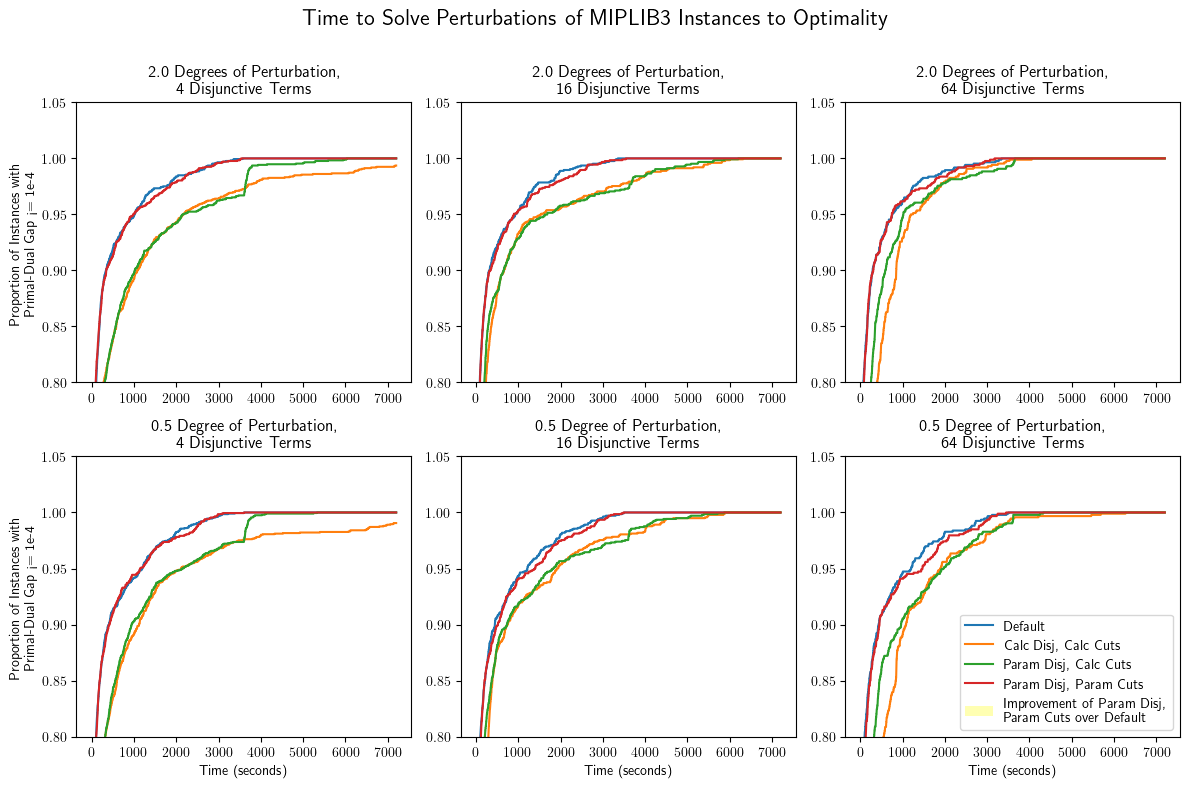

In [57]:
make_plots(time_df, "terminationTime", show_all=True)

# Make node table

In [58]:
# additional filtering for dataframe on nodes processed
fields = ["nodes New", "nodes Old", "nodes Farkas",
          "nodes None", "terminationTimeImprovement"]
node_df = df.loc[mask, group_cols + id_cols + fields]
for f in fields:
    node_df[f] = node_df[f] / 1000

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = node_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "node.csv"), index=False, mode="w")
out

,degree,terms,nodes New,nodes Old,nodes Farkas,nodes None,terminationTimeImprovement,instance,instanceIndex
0,0.5,4,137.344304,144.255717,135.349076,142.973705,-0.000512,248,2013
1,0.5,16,172.325731,181.172598,182.833605,178.851886,-0.001779,191,1382
2,0.5,64,204.308737,214.601835,209.918138,211.610262,-0.005516,138,930
3,2.0,4,120.000208,117.512630,115.031518,118.177659,-0.000679,258,1725
4,2.0,16,155.931034,162.099926,158.601828,159.335759,-0.003225,192,1256
5,2.0,64,204.118394,206.494095,196.727289,203.090405,-0.005927,139,861


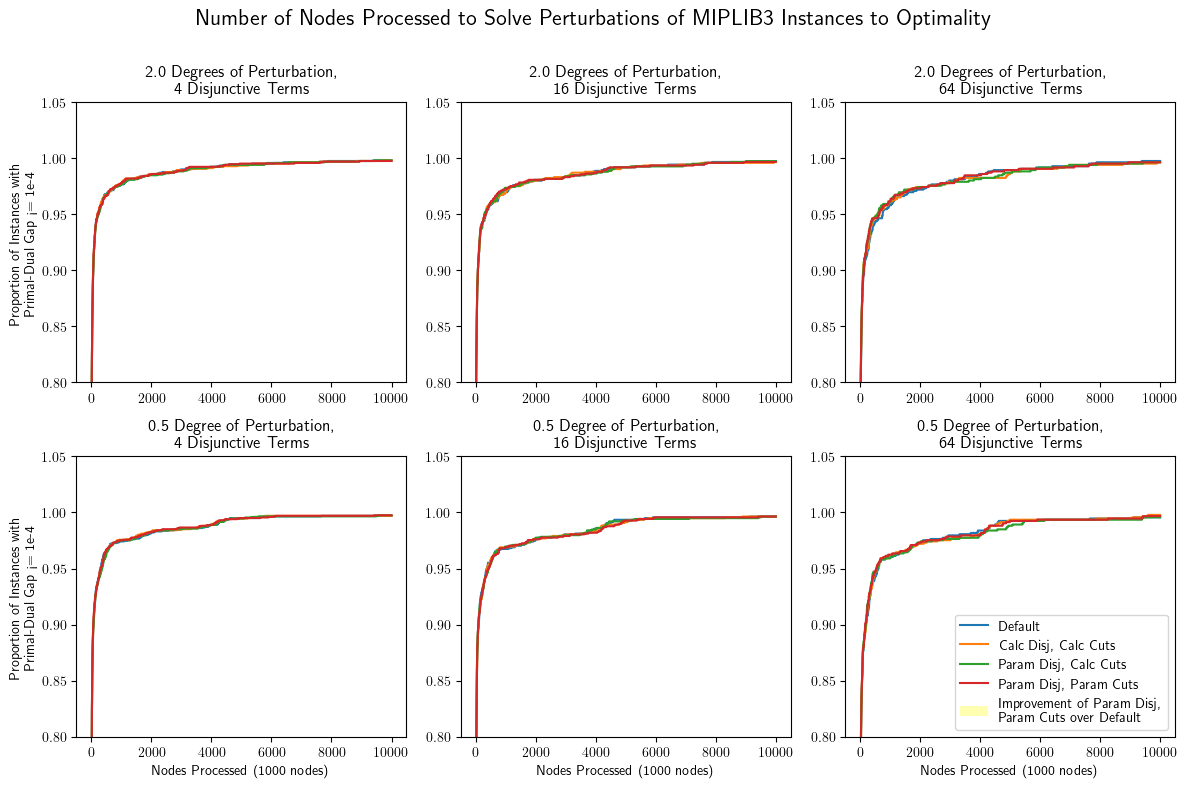

In [59]:
make_plots(node_df, "nodes", show_all=True)

# Make iteration table

In [60]:
# additional filtering for dataframe on nodes processed
fields = ["iterations New", "iterations Old",
          "iterations Farkas", "iterations None",
          "terminationTimeImprovement"]
iteration_df = df.loc[mask, group_cols + id_cols + fields]
for f in fields:
    iteration_df[f] = iteration_df[f] / 1000

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = iteration_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "iteration.csv"), index=False, mode="w")
out

,degree,terms,iterations New,iterations Old,iterations Farkas,iterations None,terminationTimeImprovement,instance,instanceIndex
0,0.5,4,1171.663087,1262.806694,1166.166523,1178.624128,-0.000512,248,2013
1,0.5,16,1360.496390,1399.239864,1407.105781,1352.812531,-0.001779,191,1382
2,0.5,64,1620.845489,1622.378137,1587.169581,1575.181622,-0.005516,138,930
3,2.0,4,1070.922645,1095.012638,1082.672252,1080.120668,-0.000679,258,1725
4,2.0,16,1119.165189,1136.886498,1130.200786,1134.914805,-0.003225,192,1256
5,2.0,64,1277.898749,1265.490524,1237.937395,1287.188617,-0.005927,139,861


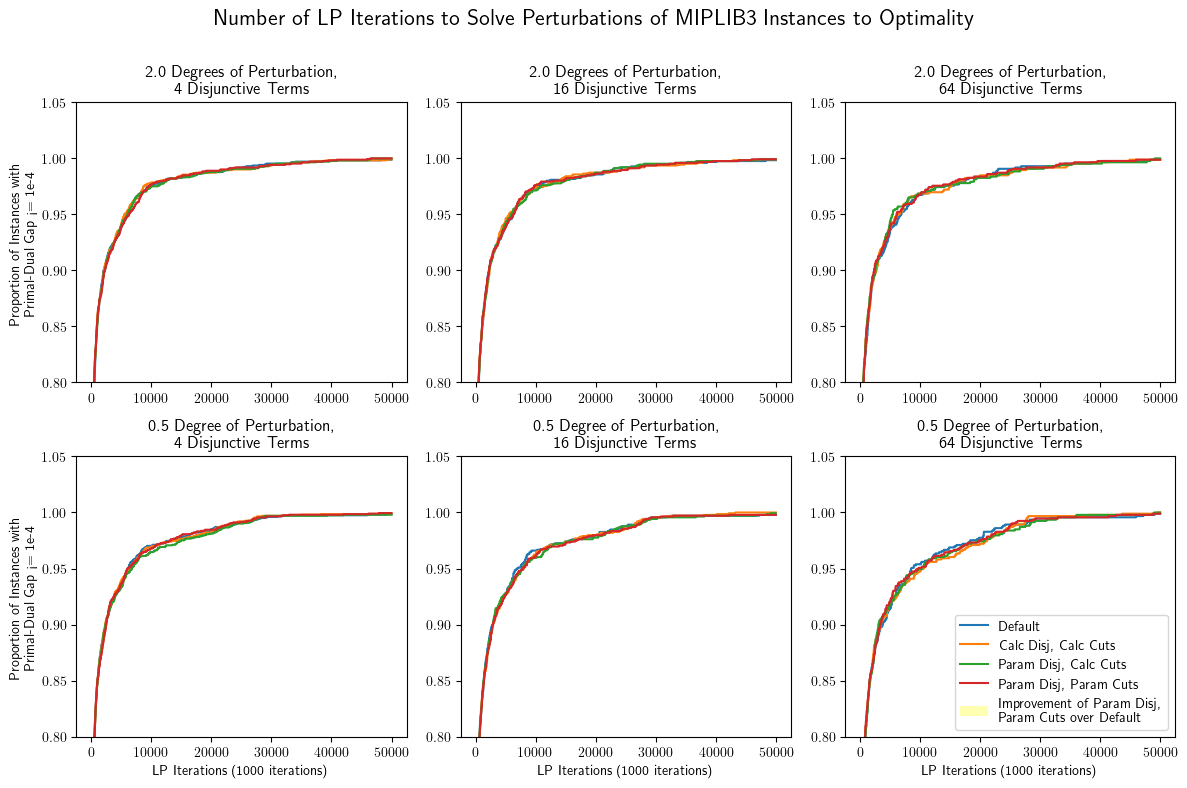

In [61]:
make_plots(iteration_df, "iterations", show_all=True)

## Improvement Consistency

In [62]:
def make_run_time_boxplot(time_df, perturbation=None, threshold=.1):
    plt.rc('text', usetex=True)  # use latex fonts

    # Get unique values of degree and terms
    degrees = time_df['degree'].sort_values(ascending=False).unique()  # sort increasing
    terms = time_df['terms'].sort_values().unique()  # sort decreasing
    
    # Create a grid of subplots
    fig, axes = plt.subplots(len(degrees), len(terms), figsize=(8*len(terms), 4*len(degrees)))
    
    # Iterate through each combination of degree and terms
    for i, degree in enumerate(degrees):
        for j, term in enumerate(terms):
            
            # get the data for this combination
            subset = time_df[(time_df['terms'] == term) &
                             (time_df['degree'] == degree)]
            
            # if we are looking at a specific perturbation, filter for it
            if perturbation is not None:
                subset = subset[subset["perturbation"] == perturbation]
                
            cut_off = subset["terminationTimeImprovement"].quantile(1 - threshold)
            
            # now break it down by instance
            unique_instances = subset['instance'].sort_values().unique()
            instance_data = [subset[subset['instance'] == instance]['terminationTimeImprovement'].tolist()
                             for instance in unique_instances]
            
            # make all the boxplots for this plot
            axes[i, j].boxplot(instance_data, labels=unique_instances)
            axes[i, j].axhline(cut_off, color='black', linestyle='--', linewidth=1, alpha=.5, label=f"Top {int(threshold * 100)} Percent of Instances")
            axes[i, j].set_ylim(-3, 1)
            axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)
            axes[i, j].set_title(f"{degree} Degree{'s' if degree >= 2 else ''} "
                                 f"of Perturbation,\n{term} Disjunctive Terms")
            if j == 0:
                axes[i, j].set_ylabel('Relative Time Improvement\n'
                                      '(Param Disj, Param Cuts vs Default)')
            if i == len(degrees) - 1:
                axes[i, j].set_xlabel('Instance')
    
    fig.suptitle(f"Distributions of Relative Time Improvement for Param Disj, "
                 f"Param Cuts compared to Default"
                 f"{' - perturbing only ' + perturbation if perturbation else ''}\n"
                 f"(positive values imply Param Disj, Param Cuts'"
                 f" run time faster than Default's)", fontsize=16)
    
    plt.tight_layout()
    plt.savefig(os.path.join(out_fldr, f"time_improvement_distribution"
                                       f"{'_' + perturbation if perturbation else ''}.png"),
                dpi=1200)
    plt.legend()
    plt.show()

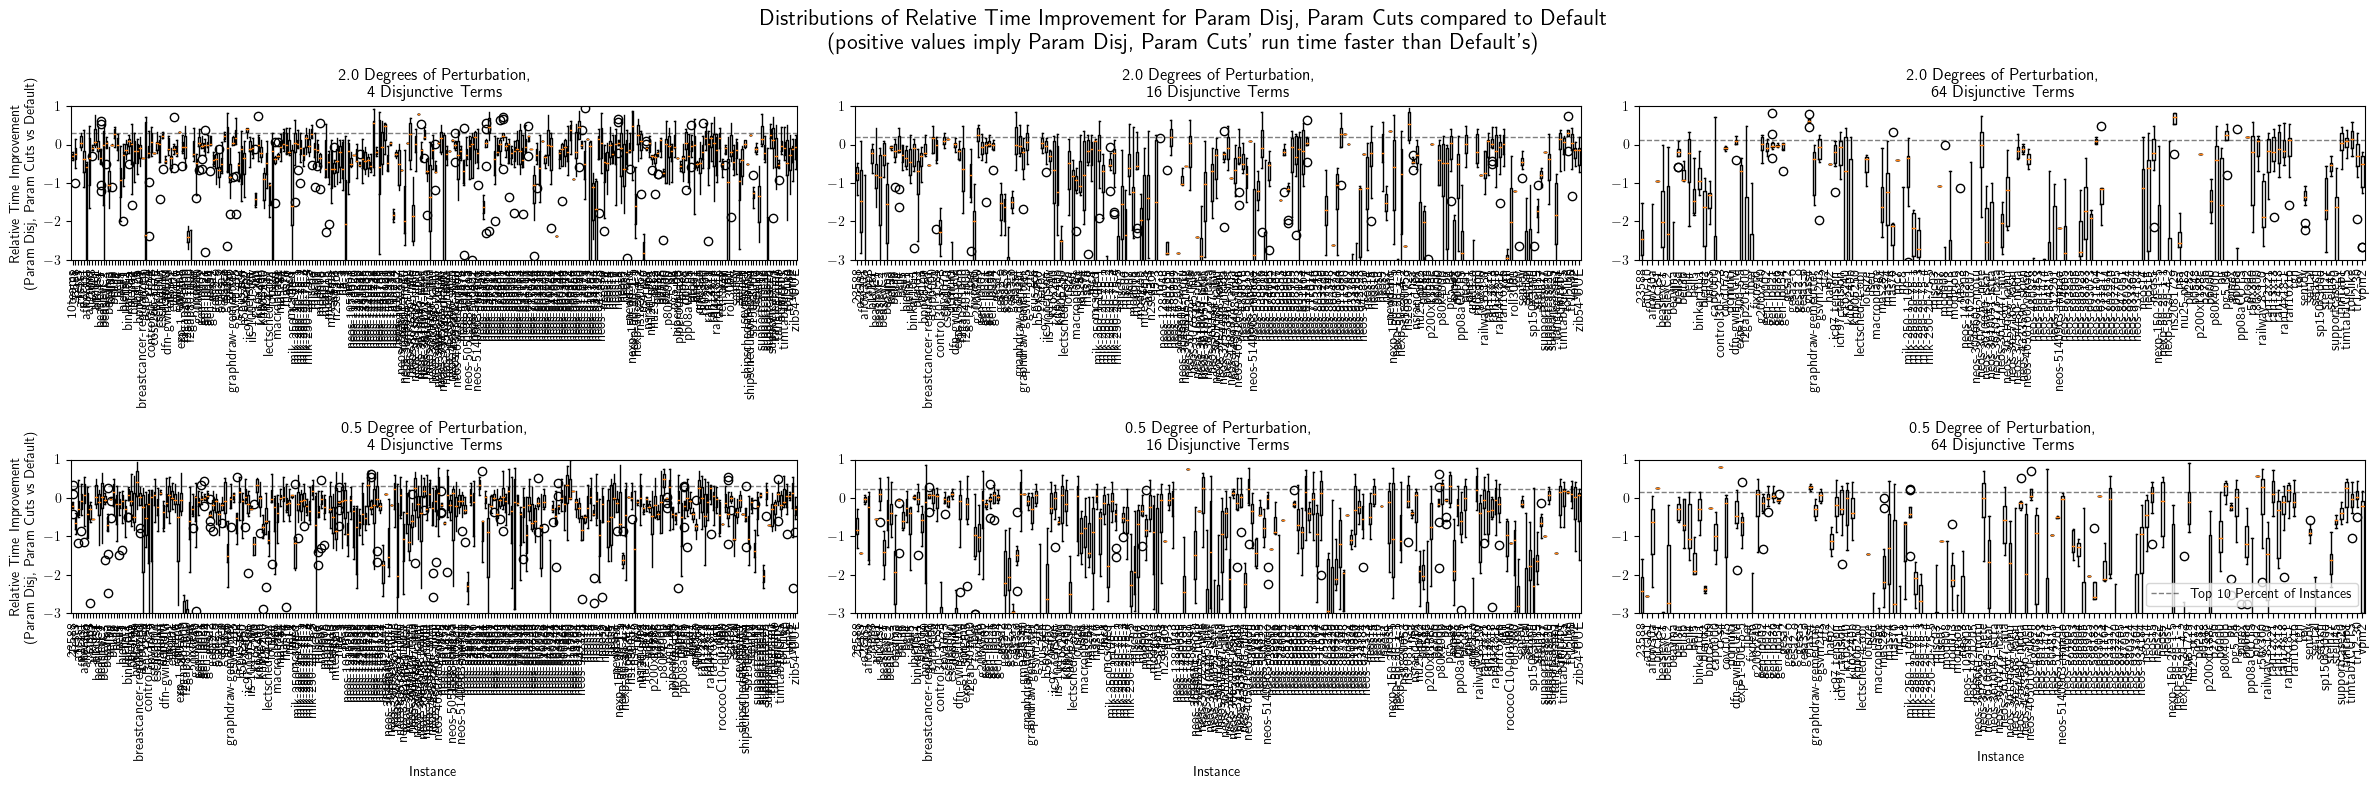

In [63]:
make_run_time_boxplot(time_df)

In [64]:
# get a table of all unperturbed instances that solved to optimality
df_zero = df_map["None"].loc[(df_map["None"]["instanceIndex"] == 0) & (optimality_gap(df_map["None"]) <= 1e-4)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


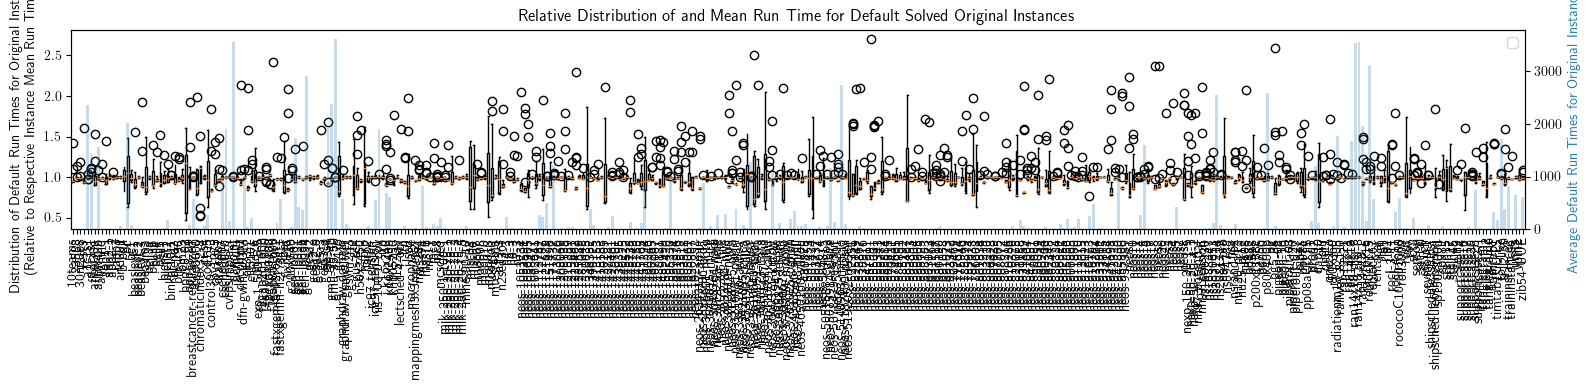

In [65]:
# configure plot
plt.rc('text', usetex=True)
fig, ax1 = plt.subplots(figsize=(16, 4))

# now break it down by instance
mean_run = df_zero.groupby("instance")["terminationTime"].mean().to_dict()
data = {instance: df_zero[df_zero['instance'] == instance]['terminationTime'].values / time
         for instance, time in mean_run.items()}

# make all the boxplots for this plot
ax1.boxplot(data.values(), labels=data.keys())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel('Distribution of Default Run Times for Original Instances\n'
               '(Relative to Respective Instance Mean Run Time)')
ax1.set_title("Relative Distribution of and Mean Run Time for Default Solved Original Instances")

# make the barchart for this plot
ax2 = ax1.twinx()
color = 'tab:blue'
plt.bar(np.arange(1, len(mean_run) + 1), mean_run.values(), alpha=.25, color=color)
ax2.set_ylabel('Average Default Run Times for Original Instances', color=color)

plt.tight_layout()
plt.savefig(os.path.join(out_fldr, "original_distribution.png"), dpi=1200)
plt.legend()
plt.show()

## Check Root Optimality Gap Relationships

In [66]:
gap_df = df.loc[mask]  # & (df["terms"] == 64) & (df["degree"] == .5)]

In [67]:
gap_df.columns

Index(['instanceIndex', 'vpcGenerator None', 'terms', 'lpBound None',
       'disjunctiveDualBound None', 'lpBoundPostVpc None',
       'rootDualBound None', 'dualBound None', 'primalBound None',
       'vpcGenerationTime None',
       ...
       'rootDualBoundTimeSansVpc New', 'rootDualBoundTimeSansVpc Old',
       'rootDualBoundTimeSansVpc Farkas', 'postRootTime None',
       'postRootTime New', 'postRootTime Old', 'postRootTime Farkas',
       'terminationTimeImprovement', 'nodeImprovement',
       'iterationImprovement'],
      dtype='object', length=106)

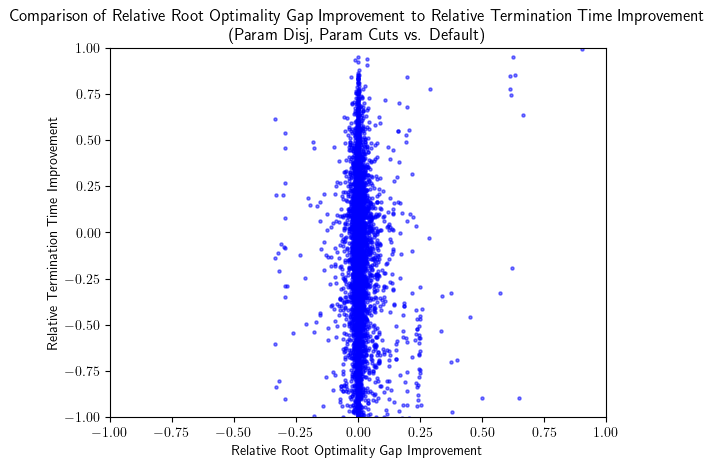

In [68]:
plt.scatter(gap_df["Root Optimality Gap Improvement"], gap_df["terminationTimeImprovement"],
            marker='o', color='blue', s=5, alpha=0.5)
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.title("Comparison of Relative Root Optimality Gap Improvement to Relative Termination Time Improvement\n"
          "(Param Disj, Param Cuts vs. Default)")
plt.xlabel("Relative Root Optimality Gap Improvement")
plt.ylabel("Relative Termination Time Improvement")
plt.savefig(os.path.join(out_fldr, "gap_vs_time.png"), dpi=1200)
plt.show()

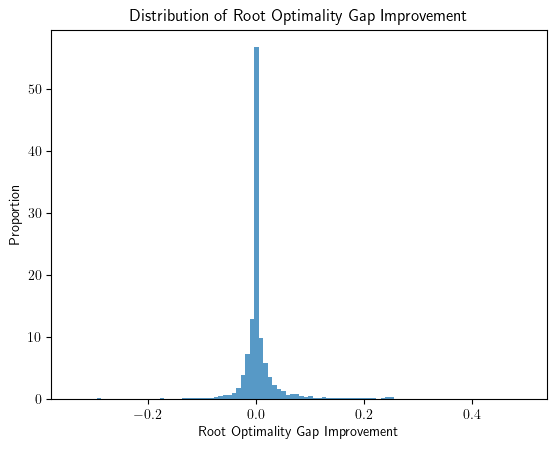

In [69]:
# Create a histogram with 100 bins
plt.hist(gap_df.loc[(-.5 < gap_df["Root Optimality Gap Improvement"]) & (gap_df["Root Optimality Gap Improvement"] < .5),
                    "Root Optimality Gap Improvement"], bins=100, density=True, alpha=0.75)

# Add labels and a title
plt.xlabel('Root Optimality Gap Improvement')
plt.ylabel('Proportion')
plt.title('Distribution of Root Optimality Gap Improvement')

# Display the plot
plt.show()

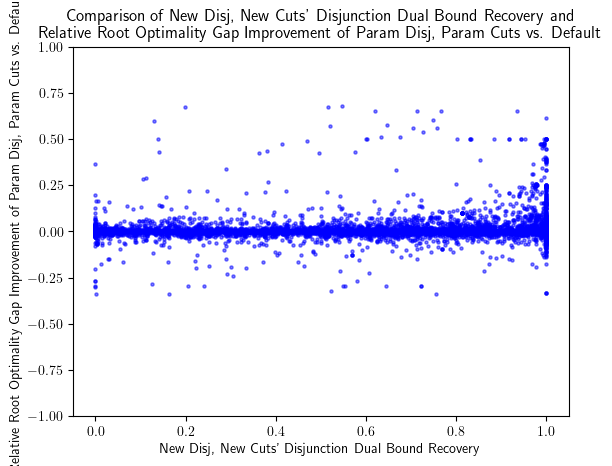

In [70]:
# is there a relationship between how much of dual bound we recover and root optimality gap improvement
plt.scatter(gap_df["VPCs (New)"] / gap_df["Disjunction (New)"],
            gap_df["Root Optimality Gap Improvement"],
            marker='o', color='blue', s=5, alpha=0.5)
plt.ylim(-1, 1)
plt.title("Comparison of New Disj, New Cuts' Disjunction Dual Bound Recovery and\n"
          "Relative Root Optimality Gap Improvement of Param Disj, Param Cuts vs. Default")
plt.xlabel("New Disj, New Cuts' Disjunction Dual Bound Recovery")
plt.ylabel("Relative Root Optimality Gap Improvement of Param Disj, Param Cuts vs. Default")
plt.show()

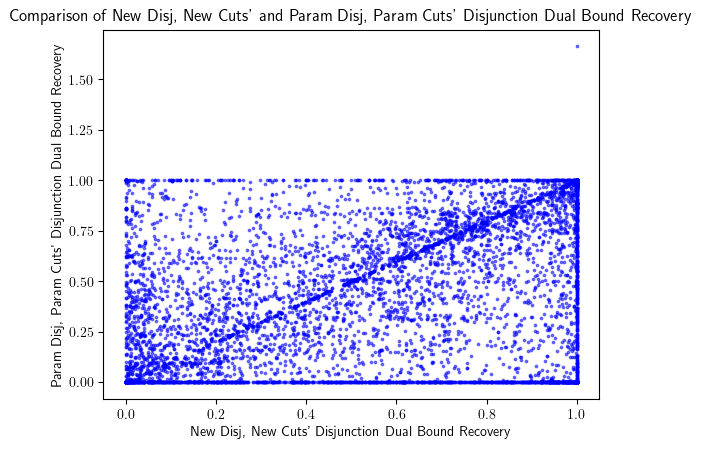

In [71]:
# is there a relationship between how much of dual bound we recover with New vs Farkas VPCs
plt.scatter(gap_df["VPCs (New)"] / gap_df["Disjunction (New)"],
            gap_df["VPCs (Farkas)"] / gap_df["Disjunction (Old)"],
            marker='o', color='blue', s=3, alpha=0.5)
plt.title("Comparison of New Disj, New Cuts' and Param Disj, Param Cuts' Disjunction Dual Bound Recovery")
plt.xlabel("New Disj, New Cuts' Disjunction Dual Bound Recovery")
plt.ylabel("Param Disj, Param Cuts' Disjunction Dual Bound Recovery")
plt.show()  # todo: what happens when Param Disj, Param Cuts recovers the same amount of dual bound?

In [72]:
df.columns

Index(['instanceIndex', 'vpcGenerator None', 'terms', 'lpBound None',
       'disjunctiveDualBound None', 'lpBoundPostVpc None',
       'rootDualBound None', 'dualBound None', 'primalBound None',
       'vpcGenerationTime None',
       ...
       'rootDualBoundTimeSansVpc New', 'rootDualBoundTimeSansVpc Old',
       'rootDualBoundTimeSansVpc Farkas', 'postRootTime None',
       'postRootTime New', 'postRootTime Old', 'postRootTime Farkas',
       'terminationTimeImprovement', 'nodeImprovement',
       'iterationImprovement'],
      dtype='object', length=106)

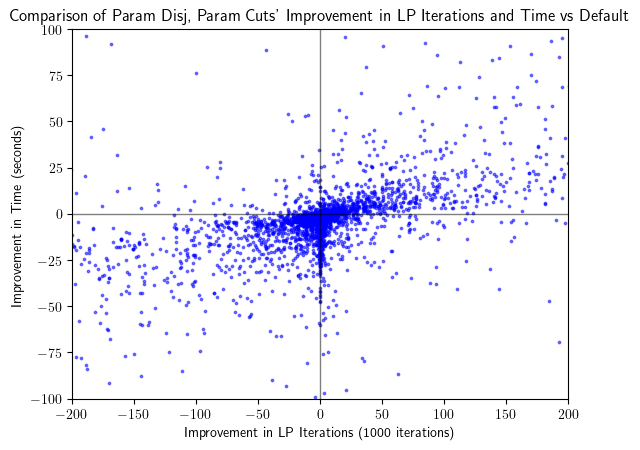

In [73]:
# plot iteration improvement over termination time improvement
# is there a relationship between how much of dual bound we recover with New vs Farkas VPCs
plt.scatter(gap_df["iterations None"]/1000 - gap_df["iterations Farkas"]/1000,
            gap_df["terminationTime None"] - gap_df["terminationTime Farkas"],
            marker='o', color='blue', s=3, alpha=0.5)
plt.xlim(-200, 200)
plt.ylim(-100, 100)
plt.axvline(0, color='black', linestyle='-', linewidth=1, alpha=.5)
plt.axhline(0, color='black', linestyle='-', linewidth=1, alpha=.5)
plt.title("Comparison of Param Disj, Param Cuts' Improvement in LP Iterations and Time vs Default")
plt.xlabel("Improvement in LP Iterations (1000 iterations)")
plt.ylabel("Improvement in Time (seconds)")
plt.savefig(os.path.join(out_fldr, "lp_iters_vs_time.png"), dpi=1200)
plt.show()

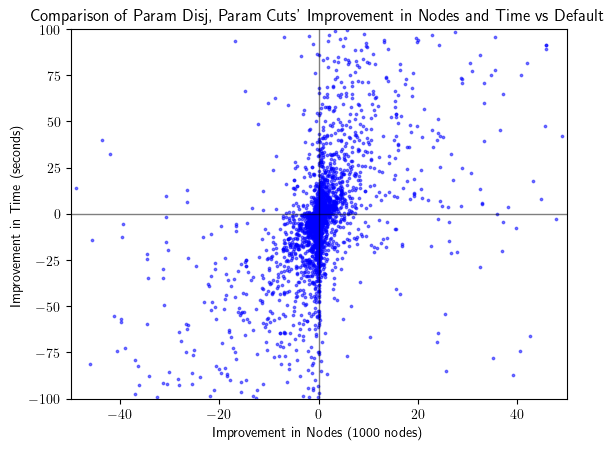

In [74]:
# plot iteration improvement over termination time improvement
# is there a relationship between how much of dual bound we recover with New vs Farkas VPCs
plt.scatter(gap_df["nodes None"]/1000 - gap_df["nodes Farkas"]/1000,
            gap_df["terminationTime None"] - gap_df["terminationTime Farkas"],
            marker='o', color='blue', s=3, alpha=0.5)
plt.xlim(-50, 50)
plt.ylim(-100, 100)
plt.axvline(0, color='black', linestyle='-', linewidth=1, alpha=.5)
plt.axhline(0, color='black', linestyle='-', linewidth=1, alpha=.5)
plt.title("Comparison of Param Disj, Param Cuts' Improvement in Nodes and Time vs Default")
plt.xlabel("Improvement in Nodes (1000 nodes)")
plt.ylabel("Improvement in Time (seconds)")
plt.savefig(os.path.join(out_fldr, "nodes_vs_time.png"), dpi=1200)
plt.show()

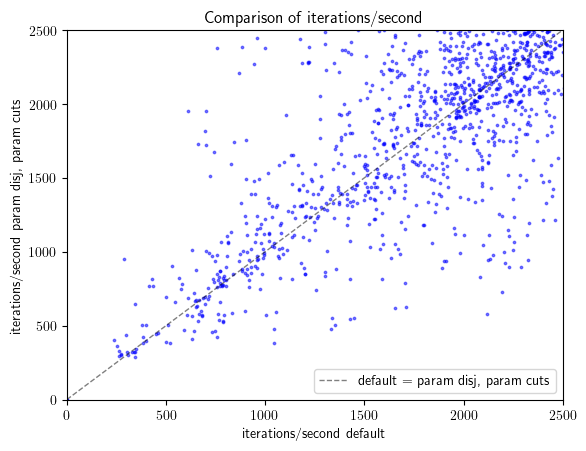

In [75]:
# plot iteration improvement over termination time improvement
# is there a relationship between how much of dual bound we recover with New vs Farkas VPCs
plt.scatter(gap_df["iterations Farkas"]/gap_df["terminationTimeSansVpc Farkas"],
            gap_df["iterations None"]/gap_df["terminationTimeSansVpc None"],
            marker='o', color='blue', s=3, alpha=0.5)
# plot the line y = x
x = np.linspace(0, 3000, 3000)
plt.plot(x, x, linestyle='--', color='black', linewidth=1, alpha=.5,
         label="default = param disj, param cuts")
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.title("Comparison of iterations/second")
plt.xlabel("iterations/second default")
plt.ylabel("iterations/second param disj, param cuts")
plt.legend()
plt.savefig(os.path.join(out_fldr, "lp_iters_per_second.png"), dpi=1200)
plt.show()

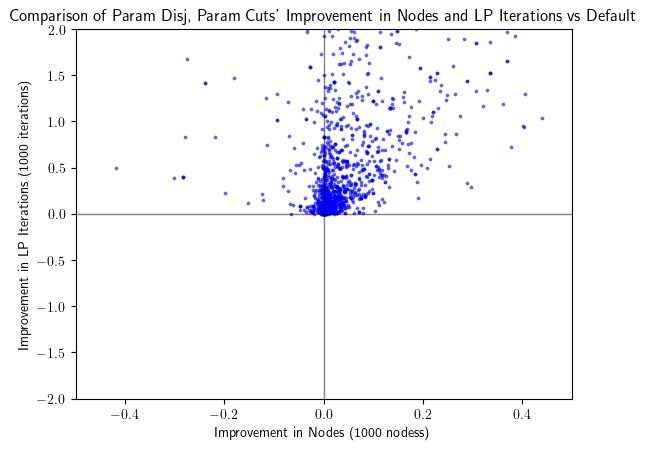

In [76]:
# plot node improvement over iteration improvement
# is there a relationship between how much of dual bound we recover with New vs Farkas VPCs
tdf = gap_df.loc[(gap_df["iterationImprovement"] > 0) & (gap_df["terminationTimeImprovement"] < 0)]
plt.scatter(tdf["nodes None"]/1000 - tdf["nodes Farkas"]/1000,
            tdf["iterations None"]/1000 - tdf["iterations Farkas"]/1000,
            marker='o', color='blue', s=3, alpha=0.5)
plt.xlim(-.5, .5)
plt.ylim(-2, 2)
plt.axvline(0, color='black', linestyle='-', linewidth=1, alpha=.5)
plt.axhline(0, color='black', linestyle='-', linewidth=1, alpha=.5)
plt.title("Comparison of Param Disj, Param Cuts' Improvement in Nodes and LP Iterations vs Default")
plt.xlabel("Improvement in Nodes (1000 nodess)")
plt.ylabel("Improvement in LP Iterations (1000 iterations)")
plt.savefig(os.path.join(out_fldr, "nodes_vs_lp_iters_werid.png"), dpi=1200)
plt.show()

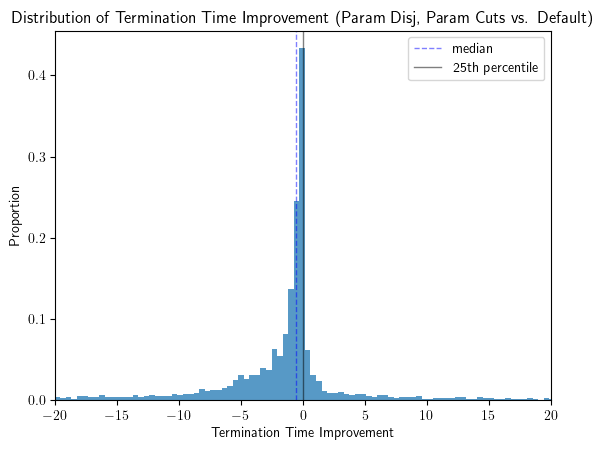

In [77]:
# Create a histogram with 600 bins
plt.hist(gap_df["terminationTime None"] - gap_df["terminationTime Farkas"],
         bins=14400, density=True, alpha=0.75)
plt.xlim(-20, 20)

cut_off = (gap_df["terminationTime None"] - gap_df["terminationTime Farkas"]).quantile(.5)
zeroth_percentile = int(100 * round((gap_df["terminationTime None"] >= gap_df["terminationTime Farkas"]).sum() / len(gap_df), 2))
plt.axvline(cut_off, color='blue', linestyle='--', linewidth=1, alpha=.5, label=f"median")
plt.axvline(0, color='black', linestyle='-', linewidth=1, alpha=.5, label=f"{zeroth_percentile}th percentile")

# Add labels and a title
plt.xlabel('Termination Time Improvement')
plt.ylabel('Proportion')
plt.title('Distribution of Termination Time Improvement (Param Disj, Param Cuts vs. Default)')

# Display the plot
plt.legend()
plt.savefig(os.path.join(out_fldr, "time_improvement_distribution.png"), dpi=1200)
plt.show()

In [78]:
gap_df

,instanceIndex,vpcGenerator None,terms,lpBound None,disjunctiveDualBound None,lpBoundPostVpc None,rootDualBound None,dualBound None,primalBound None,vpcGenerationTime None,...,rootDualBoundTimeSansVpc New,rootDualBoundTimeSansVpc Old,rootDualBoundTimeSansVpc Farkas,postRootTime None,postRootTime New,postRootTime Old,postRootTime Farkas,terminationTimeImprovement,nodeImprovement,iterationImprovement
4,1,None,16,197417.068309,197417.068309,197417.068309,388301.647501,405935.180000,405935.180000,0.000003,...,0.267146,0.176447,0.265484,0.522090,0.643283,0.440885,0.763447,-0.972788,-0.523810,-0.327646
5,2,None,16,198953.454988,198953.454988,198953.454988,401290.190660,405935.180000,405935.180000,0.000007,...,0.182322,0.380089,0.193677,0.392828,0.067967,0.508364,0.335205,-0.905591,0.447761,0.152336
6,3,None,16,210037.457216,210037.457216,210037.457216,386773.032430,407941.580000,407941.580000,0.000003,...,0.274578,0.329162,0.219876,0.488073,0.164839,0.190704,0.546179,-0.693691,-0.859296,-0.253271
7,4,None,16,199363.535637,199363.535637,199363.535637,390151.204045,405935.180000,405935.180000,0.000003,...,0.227714,0.323224,0.373126,0.271718,0.271063,0.368440,0.763376,-3.008221,-0.920000,-0.620122
8,5,None,16,195284.317586,195284.317586,195284.317586,402085.650674,405935.180000,405935.180000,0.000003,...,0.221854,0.264317,0.441041,0.059586,0.149424,0.032075,0.284379,-3.009743,-2.862069,-0.924437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,1,None,16,0.010856,0.010856,0.010856,0.039218,0.321228,0.321228,0.000003,...,0.175697,0.209842,0.167411,65.093324,225.266261,59.700633,96.976673,-0.499740,-0.887260,-0.745557
12152,2,None,16,0.010572,0.010572,0.010572,0.025866,0.178185,0.178198,0.000003,...,0.172782,0.246196,0.221854,12.053965,16.711920,9.545135,7.368141,0.311664,0.390799,0.430188
12153,3,None,16,0.009762,0.009762,0.009762,0.036309,0.252931,0.252948,0.000003,...,0.220907,0.203528,0.204797,232.206049,76.720969,128.606057,115.179721,0.500258,0.477367,0.486380
12154,4,None,16,0.011922,0.011922,0.011922,0.044839,0.329957,0.329987,0.000003,...,0.210623,0.184038,0.189167,573.806967,476.403870,389.181579,385.333899,0.327052,0.290765,0.274887


## See Where My Work Went off the Rails

In [79]:
# create a table to compare unperturbed instances with aleks' results for them
groups = ["instance", "terms"]
fields = ["lpBound New", "disjunctiveDualBound New", "lpBoundPostVpc New", "rootDualBound None",
          "rootDualBound New", "primalBound None", "terminationTime None", "Root Cuts (New)", "Root Cuts (None)"]
comp = df.loc[df["instanceIndex"] == 0, groups + fields].groupby(groups).mean().reset_index()
comp.to_csv(os.path.join(out_fldr, "unperturbed_bound_table.csv"), index=False, mode="w")
comp

,instance,terms,lpBound New,disjunctiveDualBound New,lpBoundPostVpc New,rootDualBound None,rootDualBound New,primalBound None,terminationTime None,Root Cuts (New),Root Cuts (None)
0,10teams,4,9.170000e+02,9.170000e+02,9.170000e+02,9.240000e+02,9.240000e+02,9.240000e+02,0.883275,1.000000,1.000000
1,23588,4,7.649866e+03,7.799913e+03,7.774120e+03,7.770368e+03,7.797326e+03,8.090000e+03,1.710106,0.335035,0.273784
2,23588,16,7.649866e+03,7.867861e+03,7.862267e+03,7.770368e+03,7.867450e+03,8.090000e+03,1.668357,0.494358,0.273784
3,23588,64,7.649866e+03,7.967565e+03,7.966053e+03,7.770368e+03,7.966000e+03,8.090000e+03,1.667167,0.718268,0.273784
4,50v-10,4,2.879066e+03,2.892466e+03,2.892466e+03,3.194914e+03,3.200994e+03,3.311180e+03,3600.003210,0.745007,0.730938
...,...,...,...,...,...,...,...,...,...,...,...
700,vpm2,4,1.113563e+01,1.115015e+01,1.114971e+01,1.298076e+01,1.303330e+01,1.375000e+01,0.851611,0.725861,0.705763
701,vpm2,16,1.113563e+01,1.126981e+01,1.123504e+01,1.298076e+01,1.303330e+01,1.375000e+01,0.885728,0.725861,0.705763
702,vpm2,64,1.113563e+01,1.150931e+01,1.128169e+01,1.298076e+01,1.303330e+01,1.375000e+01,0.881143,0.725861,0.705763
703,zib54-UUE,4,4.330388e+06,4.623696e+06,4.377302e+06,8.588672e+06,8.504556e+06,1.033402e+07,596.672498,0.695274,0.709285


In [80]:
# create a table with aleks's results for the unperturbed instances 
adf = pd.read_csv("aleks_results.csv")
adf = adf[["INSTANCE", "disj_terms", "LP OBJ", "BEST DISJ OBJ", "VPC OBJ", "AVG REF LAST_CUT_PASS", "AVG REF+V LAST_CUT_PASS", "ip_obj", "BEST REF TIME"]]
adf["rcnew"] = abs(adf["AVG REF+V LAST_CUT_PASS"] - adf["LP OBJ"]) / abs(adf["ip_obj"] - adf["LP OBJ"]) 
adf["rcnone"] = abs(adf["AVG REF LAST_CUT_PASS"] - adf["LP OBJ"]) / abs(adf["ip_obj"] - adf["LP OBJ"])
adf.columns = groups + fields
adf['instance'] = adf['instance'].str.replace('_presolved', '')
adf['instance'] = adf['instance'].str.replace('mas0', 'mas')
adf = adf.loc[(0 <= adf["Root Cuts (New)"]) & (adf["Root Cuts (New)"] <= 1)]

In [81]:
# join comp and adf on instance and terms to get a comparison of the two and see what's missing
keep_cols = groups + ["Root Cuts (New)", "Root Cuts (None)", "terminationTime None"]
both = comp[keep_cols].merge(adf[keep_cols], on=groups, suffixes=(" sean", " aleks"), how="outer")
both

,instance,terms,Root Cuts (New) sean,Root Cuts (None) sean,terminationTime None sean,Root Cuts (New) aleks,Root Cuts (None) aleks,terminationTime None aleks
0,10teams,4.0,1.000000,1.000000,0.883275,1.000000,1.000000,0.301
1,23588,4.0,0.335035,0.273784,1.710106,0.318880,0.243813,0.420
2,23588,16.0,0.494358,0.273784,1.668357,0.487854,0.243813,0.424
3,23588,64.0,0.718268,0.273784,1.667167,0.717759,0.243813,0.421
4,50v-10,4.0,0.745007,0.730938,3600.003210,0.744229,0.733697,1551.658
...,...,...,...,...,...,...,...,...
2167,uct-subprob,64.0,NaN,NaN,NaN,0.486831,0.484625,879.891
2168,umts,64.0,NaN,NaN,NaN,0.049433,0.047454,49.839
2169,usAbbrv-8-25_70,64.0,NaN,NaN,NaN,0.000000,0.000000,3600.000
2170,vpm1,64.0,NaN,NaN,NaN,0.721295,0.681575,0.004


In [82]:
# make a dataframe that compares the experiments we both ran
diff = both.loc[~pd.isna(both["Root Cuts (New) sean"]) & ~pd.isna(both["Root Cuts (New) aleks"])]
diff["improvement aleks"] = (diff["Root Cuts (New) aleks"] - diff["Root Cuts (None) aleks"]) / diff["Root Cuts (None) aleks"]

# get some summary stats - looks like we are pretty close
# I expect the difference is that I'm running in debug mode (time), not adding GMICs, using different gurobis, and using different sized disjunctions 
diff[diff.columns[2:]].mean()

/var/folders/pb/p1sshdnx5sv12zwsxff8nrg40000gn/T/ipykernel_37099/815611217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff["improvement aleks"] = (diff["Root Cuts (New) aleks"] - diff["Root Cuts (None) aleks"]) / diff["Root Cuts (None) aleks"]


Root Cuts (New) sean            0.571783
Root Cuts (None) sean           0.561566
terminationTime None sean     504.057822
Root Cuts (New) aleks           0.547682
Root Cuts (None) aleks          0.529023
terminationTime None aleks    275.968199
improvement aleks                    inf
dtype: float64

In [83]:
# let's examine the instances for which I don't have data
mdf = both.loc[(both["Root Cuts (None) sean"].isna()) & (both["terms"].isin([4, 16, 64])),
               ["instance", "terms", "Root Cuts (New) aleks", "Root Cuts (None) aleks", "terminationTime None aleks"]]
mdf.columns = ["instance", "terms", "Root Cuts (New)", "Root Cuts (None)", "terminationTime None"]
mdf["improvement"] = (mdf["Root Cuts (New)"] - mdf["Root Cuts (None)"]) / mdf["Root Cuts (None)"]
mdf

,instance,terms,Root Cuts (New),Root Cuts (None),terminationTime None,improvement
99,decomp1,16.0,NaN,NaN,NaN,NaN
100,decomp1,64.0,NaN,NaN,NaN,NaN
107,enigma,4.0,NaN,NaN,NaN,NaN
108,enigma,16.0,NaN,NaN,NaN,NaN
109,enigma,64.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2167,uct-subprob,64.0,0.486831,0.484625,879.891,0.004553
2168,umts,64.0,0.049433,0.047454,49.839,0.041720
2169,usAbbrv-8-25_70,64.0,0.000000,0.000000,3600.000,NaN
2170,vpm1,64.0,0.721295,0.681575,0.004,0.058276


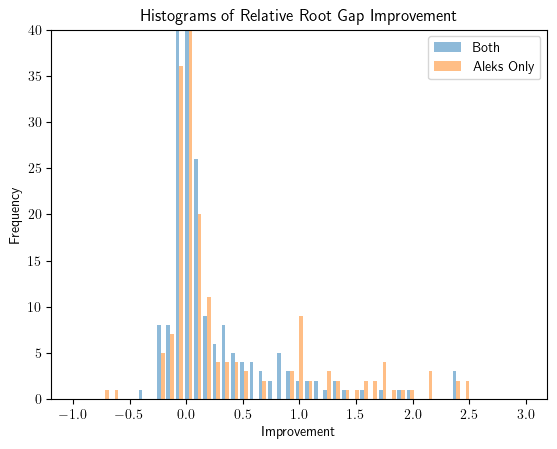

In [84]:
# Plot histograms
plt.hist([diff["improvement aleks"], mdf["improvement"]], bins=np.linspace(-1, 3, 50), alpha=0.5, label=['Both', 'Aleks Only'])

plt.ylim(0, 40)

# Add labels and title
plt.xlabel('Improvement')
plt.ylabel('Frequency')
plt.title('Histograms of Relative Root Gap Improvement')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [85]:
# set the index of mdf to the combination of instance and terms
mdf = mdf.set_index(["instance", "terms"])
mdf

Root Cuts (New)  Root Cuts (None)  \
instance        terms                                      
decomp1         16.0               NaN               NaN   
                64.0               NaN               NaN   
enigma          4.0                NaN               NaN   
                16.0               NaN               NaN   
                64.0               NaN               NaN   
...                                ...               ...   
uct-subprob     64.0          0.486831          0.484625   
umts            64.0          0.049433          0.047454   
usAbbrv-8-25_70 64.0          0.000000          0.000000   
vpm1            64.0          0.721295          0.681575   
zib54-UUE       64.0          0.681297          0.687208   

                       terminationTime None  improvement  
instance        terms                                     
decomp1         16.0                    NaN          NaN  
                64.0                    NaN          NaN  
enigma          4.0                     NaN          NaN  
                16.0                    NaN          NaN  
                64.0                    NaN          NaN  
...                                     ...          ...  
uct-subprob     64.0                879.891     0.004553  
umts            64.0                 49.839     0.041720  
usAbbrv-8-25_70 64.0               3600.000          NaN  
vpm1            64.0                  0.004     0.058276  
zib54-UUE       64.0                103.298    -0.008602  

[445 rows x 4 columns]

In [86]:
# classify missing experiment data by excluded instance (either aleks' mislabeled or I just missed), max run time, unperturbable, or run time error
mdf["reason"] = "unknown"

# read in list of dropped instances from aleks' data set
# i think the issue is some aleks tested despite saying he wasn't and others were more than 5k x 5k rows but preprocess to less
dropped = pd.read_csv("dropped.csv", index_col="instance")

for (instance, terms) in mdf.index:
    cur_inst_test_set_fldr = os.path.join(test_set_fldr, instance)
    if instance + ".mps" not in os.listdir(instance_fldr):
        if instance in dropped.index:
            mdf.loc[(instance, terms), "reason"] = "dropped"  # excluded by vpc
        else:
            mdf.loc[(instance, terms), "reason"] = "missed"  # not run yet
    elif mdf.loc[(instance, terms), "terminationTime None"] > 3599:
        mdf.loc[(instance, terms), "reason"] = "max run time"  # hit the max run time
    elif not os.path.exists(cur_inst_test_set_fldr) or not os.listdir(cur_inst_test_set_fldr):
        mdf.loc[(instance, terms), "reason"] = "unperturbable"  # weren't able to perturb
    else:
        mdf.loc[(instance, terms), "reason"] = "runtime error"  # crashed or ran within 1 hour but no results data

In [87]:
# summary stats on where our improving runs are hiding
stats = mdf.groupby("reason").agg({'Root Cuts (New)': 'mean', 'Root Cuts (None)': 'mean', 'improvement': 'count'}).reset_index()
stats.rename(columns={"improvement": "count"}, inplace=True)
stats["weighted improvement"] = (stats["Root Cuts (New)"] - stats["Root Cuts (None)"]) * stats["count"]
stats["weighted improvement"] = (stats["weighted improvement"] / stats["weighted improvement"].sum()).round(4)
stats.sort_values("weighted improvement", ascending=False)

,reason,Root Cuts (New),Root Cuts (None),count,weighted improvement
3,runtime error,0.438212,0.377991,209,0.6289
0,dropped,0.480467,0.412771,66,0.2232
2,missed,0.470387,0.180855,9,0.1302
1,max run time,0.328701,0.323918,74,0.0177
4,unperturbable,0.207571,0.207572,5,-0.0000


In [88]:
# track down the experiments we excluded because we missed creating them
# stein9 is an outlier pushing things up
missing = mdf[mdf["reason"] == "missed"]
missing

,,Root Cuts (New),Root Cuts (None),terminationTime None,improvement,reason
instance,terms,,,,,
square23,4.0,0.143904,0.145988,12.878,-0.014275,missed
stein09,4.0,0.000000,0.000000,0.004,NaN,missed
stein27_nocard,4.0,0.310054,0.290804,0.155,0.066198,missed
stein45_nocard,4.0,0.272634,0.263384,3.704,0.035122,missed
stein09,16.0,1.000000,0.000000,0.004,inf,missed
stein27_nocard,16.0,0.444444,0.290804,0.154,0.528332,missed
stein45_nocard,16.0,0.386364,0.263384,3.306,0.466922,missed
stein09,64.0,1.000000,0.000000,0.004,inf,missed
stein27_nocard,64.0,0.555556,0.290804,0.153,0.910415,missed


In [89]:
# let's look at what aleks "missed"
aleks_missing = both.loc[pd.isna(both["Root Cuts (New) aleks"])].drop_duplicates("instance").sort_values("instance")
aleks_missing["row"], aleks_missing["col"], aleks_missing["source"] = 0, 0, "unknown"
aleks_missing.set_index("instance", inplace=True)

# get problem size
for instance in aleks_missing.index:
    aleks_missing.loc[instance, "row"] = rows.get(instance, 0)
    aleks_missing.loc[instance, "col"] = cols.get(instance, 0)
    
# get source of instance
for instance in aleks_missing.index:
    for fldr in os.listdir("../../"):
        if not os.path.isdir(f"../../{fldr}"):
            continue
        if instance + ".mps" in os.listdir(f"../../{fldr}") or instance + ".mps.gz" in os.listdir(f"../../{fldr}"):
            aleks_missing.loc[instance, "source"] = fldr

# trim down to what we want - looks like mas misnamed but otherwise we are good
aleks_missing = aleks_missing[["row", "col", "source"]]
aleks_missing

,row,col,source
instance,,,
Test3,50680,72215,coral
app2-2,335,1226,miplib2017
arki001,1048,1388,miplib3
beavma,372,390,miplib2017
bell4,105,117,miplib2
...,...,...,...
shipschedule6shipsmixi,18307,14012,miplib2017
stein9,13,9,miplib2
supportcase27i,2104,2281,miplib2017


In [90]:
# now lets track down which error modes are sinking us most
run_error = mdf[mdf["reason"] == "runtime error"]

# collect the ways each instance/term combination fails
err_map = []

# iterate over instances and terms of aleks' tests we're missing because of run errors
for instance, terms in run_error.index:
    terms = int(terms)
    found_err = False
    
    # iterate over our error modes to find matches
    for mode, failed_experiments in err.items():
        for failed_experiment in failed_experiments:
            if f"{instance}_" in failed_experiment and f"_{terms}_" in failed_experiment:
                
                # if we find a match, see if we can get a more specific error mode
                sub_mode = mode
                if sub_mode == "no vpcs were made from a new disjunction":
                    sub_mode = [vpc_err_mode for vpc_err_mode, vpc_err_exps in vpc_err.items()
                            if failed_experiment in vpc_err_exps].pop()
                
                # append the mode
                err_map.append({
                    "instance": instance,
                    "terms": float(terms),
                    "mode": sub_mode,
                    "experiment": failed_experiment,
                    "experiment group": "_".join(failed_experiment.split("_")[:-1]),
                    "cut type": failed_experiment.split("_")[-1]
                })
                found_err = True
                
    # do the same thing as the above for all other termination modes
    misc = {"other": other, "warning": warning, "empty": empty}
    for mode, failed_experiments in misc.items():
        for failed_experiment in failed_experiments:
            if f"{instance}_" in failed_experiment and f"_{terms}_" in failed_experiment:
                err_map.append({
                    "instance": instance,
                    "terms": float(terms),
                    "mode": mode,
                    "experiment": failed_experiment,
                    "experiment group": "_".join(failed_experiment.split("_")[:-1]),
                    "cut type": failed_experiment.split("_")[-1]
                })
                found_err = True
                
    # double check to make sure we didn't miss any of aleks' runs for another reason
    if not found_err:
        print("no code for", instance, terms)
        
# add the error mode to the dataframe
run_error = pd.merge(run_error, pd.DataFrame(err_map).set_index(["instance", "terms"]), left_index=True, right_index=True)

# now drop the runs that showed up as failures only because their siblings failed
empty = run_error[(run_error["mode"] == "empty")]
non_empty = run_error[run_error["mode"] != "empty"]
collateral = pd.merge(empty, non_empty[["experiment group", "experiment"]],
                      on="experiment group", how="left", suffixes=("", " collateral"))
false_negs = collateral.loc[~collateral["experiment collateral"].isna(), "experiment"].unique()
run_error = run_error[~run_error["experiment"].isin(false_negs)]

run_error

Root Cuts (New)  Root Cuts (None)  terminationTime None  \
instance  terms                                                            
10teams   16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
...                          ...               ...                   ...   
zib54-UUE 64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   

                 improvement         reason  \
instance  terms                               
10teams   16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
...                      ...            ...   
zib54-UUE 64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   

                                                              mode  \
instance  terms                                                      
10teams   16.0                                  segmentation fault   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
...                                                            ...   
zib54-UUE 64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   

                                       experiment           experiment group  \
instance  terms                                                                
10teams   16.0            10teams_bound_1_16_None         10teams_bound_1_16   
          16.0         10teams_objective_1_16_New     10teams_objective_1_16   
          16.0         10teams_objective_1_16_Old     10teams_objective_1_16   
          16.0      10teams_objective_1_16_Farkas     10teams_objective_1_16   
          16.0            10teams_matrix_1_16_New        10teams_matrix_1_16   
...                                           ...                        ...   
zib54-UUE 64.0         zib54-UUE_matrix_-1_64_Old     zib54-UUE_matrix_-1_64   
          64.0      zib54-UUE_matrix_-1_64_Farkas     zib54-UUE_matrix_-1_64   
          64.0      zib54-UUE_objective_-1_64_New  zib54-UUE_objective_-1_64   
          64.0      zib54-UUE_objective_-1_64_Old  zib54-UUE_objective_-1_64   
          64.0   zib54-UUE_objective_-1_64_Farkas  zib54-UUE_objective_-1_64   

                cut type  
instance  terms           
10teams   16.0      None  
          16.0       New  
          16.0       Old  
          16.0    Farkas  
          16.0       New  
...                  ...  
zib54-UUE 64.0       Old  
          64.0    Farkas  
          64.0       New  
          64.0       Old  
          64.0    Farkas  

[3580 rows x 9 columns]

In [91]:
# summary stats on where improvements are by failure mode
run_error_stats = run_error.groupby("mode").agg({'Root Cuts (New)': 'mean', 'Root Cuts (None)': 'mean', 'improvement': 'count'}).reset_index()
run_error_stats.rename(columns={"improvement": "count"}, inplace=True)
run_error_stats["weighted improvement"] = (run_error_stats["Root Cuts (New)"] - run_error_stats["Root Cuts (None)"]) * run_error_stats["count"]
run_error_stats["weighted improvement"] = (run_error_stats["weighted improvement"] / run_error_stats["weighted improvement"].sum()).round(4)
run_error_stats.sort_values("weighted improvement", ascending=False)

,mode,Root Cuts (New),Root Cuts (None),count,weighted improvement
2,CglVPC: Finishing with exit reason: OPTIMAL_SO...,0.860867,0.525437,270,0.4882
4,CglVPC: Finishing with exit reason: PRLP_TIME_...,0.439032,0.389500,1425,0.3804
14,other,0.733361,0.436940,44,0.0703
16,segmentation fault,0.534160,0.492490,126,0.0283
11,farkas,0.408873,0.403596,578,0.0164
7,bad_alloc,0.387729,0.369881,103,0.0099
8,disjunction does not represent a full binary tree,0.358215,0.318580,24,0.0051
12,must have primalbound > root lp objective,0.558981,0.544427,18,0.0014
19,warning,0.263296,0.255635,19,0.0008
3,CglVPC: Finishing with exit reason: PRLP_INFEA...,0.067860,0.064197,24,0.0005


In [92]:
# todo: find out range of terms for time outs (are most because big tree?)
prlp_limit = run_error[run_error["mode"] == "CglVPC: Finishing with exit reason: PRLP_TIME_LIMIT"]
prlp_limit

Root Cuts (New)  Root Cuts (None)  terminationTime None  \
instance  terms                                                            
10teams   16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
          16.0          1.000000          1.000000                 0.302   
...                          ...               ...                   ...   
zib54-UUE 64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   
          64.0          0.681297          0.687208               103.298   

                 improvement         reason  \
instance  terms                               
10teams   16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
          16.0      0.000000  runtime error   
...                      ...            ...   
zib54-UUE 64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   
          64.0     -0.008602  runtime error   

                                                              mode  \
instance  terms                                                      
10teams   16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          16.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
...                                                            ...   
zib54-UUE 64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   
          64.0   CglVPC: Finishing with exit reason: PRLP_TIME_...   

                                       experiment           experiment group  \
instance  terms                                                                
10teams   16.0         10teams_objective_1_16_New     10teams_objective_1_16   
          16.0         10teams_objective_1_16_Old     10teams_objective_1_16   
          16.0      10teams_objective_1_16_Farkas     10teams_objective_1_16   
          16.0            10teams_matrix_1_16_New        10teams_matrix_1_16   
          16.0            10teams_matrix_1_16_Old        10teams_matrix_1_16   
...                                           ...                        ...   
zib54-UUE 64.0         zib54-UUE_matrix_-1_64_Old     zib54-UUE_matrix_-1_64   
          64.0      zib54-UUE_matrix_-1_64_Farkas     zib54-UUE_matrix_-1_64   
          64.0      zib54-UUE_objective_-1_64_New  zib54-UUE_objective_-1_64   
          64.0      zib54-UUE_objective_-1_64_Old  zib54-UUE_objective_-1_64   
          64.0   zib54-UUE_objective_-1_64_Farkas  zib54-UUE_objective_-1_64   

                cut type  
instance  terms           
10teams   16.0       New  
          16.0       Old  
          16.0    Farkas  
          16.0       New  
          16.0       Old  
...                  ...  
zib54-UUE 64.0       Old  
          64.0    Farkas  
          64.0       New  
          64.0       Old  
          64.0    Farkas  

[1539 rows x 9 columns]

In [93]:
# figure out actual disjunction sizes in experiments
# a regex that matches "solving for term \d+/\d+" and captures the second number
term_regex = re.compile(r"Solving for term \d+/(\d+)")

# compare timed out PRLPs to non-timed out PRLPs
actual_terms = {}
provided_terms = {}
missed_terms = []
aleks_terms = {}

# iterate over all expected runs
for instance in os.listdir(test_set_fldr):
    if not os.path.isdir(os.path.join(test_set_fldr, instance)):
        continue
    for perturbation in os.listdir(os.path.join(test_set_fldr, instance)):
        if not os.path.isdir(os.path.join(test_set_fldr, instance, perturbation)):
            continue
        p, d = perturbation.split("_")
        if int(d) not in degrees:
            continue
        for terms in term_list:
            for generator in ["None", "New", "Old", "Farkas"]:

                # get the out file for this experiment
                stem = f"{instance}_{perturbation}_{terms}_{generator}"
                provided_terms[stem] = terms
                out_file_pth = os.path.join(results_fldr, f"{stem}.out")
                if not os.path.exists(out_file_pth):
                    continue

                # read the out file
                with open(out_file_pth, "r") as f:
                    text = f.read()
                
                # search for the regex in the text
                matches = term_regex.findall(text)
                
                if matches:
                    actual_terms[stem] = int(matches[-1])
                    if generator == "Farkas":
                        aleks_terms[instance, terms] = aleks_terms.get((instance, terms), []) + [int(matches[-1])]
                else:
                    missed_terms.append(stem)
                    
# get average sized disjunction for aleks' runs
aleks_terms = {k: {"actual terms": np.mean(v)} for k, v in aleks_terms.items()}
                    
len(missed_terms) / len(provided_terms)

0.29781672816728166

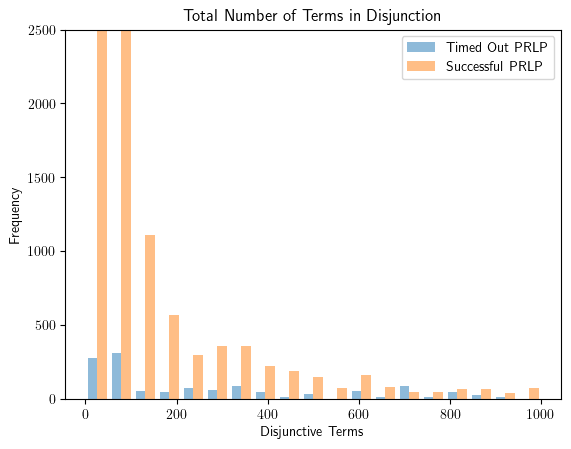

In [94]:
# plot whether or not number of disjunctive terms has an effect on timing out
actual_term_failures = [terms for stem, terms in actual_terms.items()
                        if stem in prlp_limit["experiment"].values]
actual_term_success = [terms for stem, terms in actual_terms.items()
                       if stem not in prlp_limit["experiment"].values]

deciles = {
    "success": {i * 10: np.percentile(actual_term_success, i * 10) for i in range(1, 10)},
    "failure": {i * 10: np.percentile(actual_term_failures, i * 10) for i in range(1, 10)}
}

# Plot histograms
plt.hist([actual_term_failures, actual_term_success], bins=np.linspace(0, 1000, 20), alpha=0.5, label=['Timed Out PRLP', 'Successful PRLP'])

# Add labels and title
plt.xlabel('Disjunctive Terms')
plt.ylabel('Frequency')
plt.title(f'Total Number of Terms in Disjunction')

# set y limit
plt.ylim(0, 2500)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [95]:
# get deciles on number of rows or disjunctive terms for failed and successful PRLP solves
pd.DataFrame(deciles)

,success,failure
10,4.0,16.0
20,4.0,64.0
30,4.0,73.0
40,16.0,119.0
50,30.0,260.0
60,64.0,364.0
70,101.0,627.0
80,197.0,822.0
90,490.0,2027.0


In [96]:
# what do improvements look like in terms of disjunctive terms
adf

,instance,terms,lpBound New,disjunctiveDualBound New,lpBoundPostVpc New,rootDualBound None,rootDualBound New,primalBound None,terminationTime None,Root Cuts (New),Root Cuts (None)
0,22433,2.0,2.124053e+04,21314.98074,2.131206e+04,2.141369e+04,2.140756e+04,21500.0,0.078,0.643722,0.667379
1,23588,2.0,7.649866e+03,7746.197749,7.726713e+03,7.757177e+03,7.789200e+03,8090.0,0.419,0.316571,0.243813
2,10teams,2.0,9.170000e+02,917,9.170000e+02,9.240000e+02,9.240000e+02,924.0,0.303,1.000000,1.000000
3,30n20b8,2.0,1.241230e+02,124.2095421,1.241823e+02,1.542021e+02,1.528972e+02,302.0,13.008,0.161765,0.169100
4,50v-10,2.0,2.879066e+03,2884.065687,2.884066e+03,3.195241e+03,3.199688e+03,3310.0,1928.063,0.744017,0.733697
...,...,...,...,...,...,...,...,...,...,...,...
2635,umts,64.0,2.912957e+07,29131573.54,2.913061e+07,2.917562e+07,2.917754e+07,30100000.0,49.839,0.049433,0.047454
2636,usAbbrv-8-25_70,64.0,9.500000e+01,95,9.500000e+01,9.500000e+01,9.500000e+01,120.0,3600.000,0.000000,0.000000
2637,vpm1,64.0,1.643333e+01,16.71111111,1.660000e+01,1.886429e+01,1.900595e+01,20.0,0.004,0.721295,0.681575
2638,vpm2,64.0,1.113563e+01,11.5093094,1.134045e+01,1.305095e+01,1.305186e+01,13.8,0.098,0.719205,0.718862


In [97]:
# augment aleks' results with actual disjunctive terms
atdf = pd.DataFrame.from_dict(aleks_terms, orient="index").reset_index()
atdf.columns = ["instance", "terms", "actual terms"]
atdf = pd.merge(adf, atdf, on=["instance", "terms"])
atdf = atdf[atdf["terms"] == 64]
atdf["term group"] = "None"
atdf.set_index("instance", inplace=True)
for instance in atdf.index:
    atdf.loc[instance, "term group"] = "64" if atdf.loc[instance, "actual terms"] == 64 else \
        "65 - 69" if 65 <= atdf.loc[instance, "actual terms"] <= 69 else \
        "70 - 79" if 70 <= atdf.loc[instance, "actual terms"] <= 79 else \
        "80 - 89" if 80 <= atdf.loc[instance, "actual terms"] <= 89 else \
        "90 - 99" if 90 <= atdf.loc[instance, "actual terms"] <= 99 else \
        "100 - 199" if 100 <= atdf.loc[instance, "actual terms"] <= 199 else \
        "200 - 299" if 200 <= atdf.loc[instance, "actual terms"] <= 299 else \
        "300 - 399" if 300 <= atdf.loc[instance, "actual terms"] <= 399 else \
        "400 - 499" if 400 <= atdf.loc[instance, "actual terms"] <= 499 else \
        "500 - 749" if 500 <= atdf.loc[instance, "actual terms"] <= 749 else \
        "750 - 999" if 750 <= atdf.loc[instance, "actual terms"] <= 999 else "1000+"
atdf

,terms,lpBound New,disjunctiveDualBound New,lpBoundPostVpc New,rootDualBound None,rootDualBound New,primalBound None,terminationTime None,Root Cuts (New),Root Cuts (None),actual terms,term group
instance,,,,,,,,,,,,
23588,64.0,7.649866e+03,7967.565214,7.965067e+03,7.757177e+03,7.965776e+03,8090.0,0.421,0.717759,0.243813,74.0,70 - 79
30n20b8,64.0,1.241230e+02,126.9060983,NaN,0.000000e+00,0.000000e+00,302.0,0.000,0.697802,0.697802,2036.0,1000+
50v-10,64.0,2.879066e+03,2956.881654,2.927394e+03,3.195241e+03,3.200751e+03,3310.0,1770.796,0.746484,0.733697,64.0,64
a1c1s1,64.0,4.649668e+03,4985.201862,NaN,0.000000e+00,0.000000e+00,11500.0,0.000,0.678751,0.678751,64.0,64
a2c1s1,64.0,4.110347e+03,4336.585415,4.115347e+03,1.031495e+04,1.032488e+04,10900.0,245.325,0.915295,0.913832,64.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...
traininstance6,64.0,0.000000e+00,0,NaN,0.000000e+00,0.000000e+00,28300.0,0.000,0.000000,0.000000,1107.0,1000+
uct-subprob,64.0,2.420000e+02,248.961794,2.465241e+02,2.768930e+02,2.770518e+02,314.0,879.891,0.486831,0.484625,807.0,750 - 999
umts,64.0,2.912957e+07,29131573.54,2.913061e+07,2.917562e+07,2.917754e+07,30100000.0,49.839,0.049433,0.047454,260.0,200 - 299


In [98]:
# summary stats on where improvements are by disjunction size for 64 term runs
actual_term_stats = atdf.groupby("term group").agg({'Root Cuts (New)': 'mean', 'Root Cuts (None)': 'mean', 'actual terms': 'count'}).reset_index()
actual_term_stats.rename(columns={"actual terms": "count"}, inplace=True)
actual_term_stats["weighted improvement"] = (actual_term_stats["Root Cuts (New)"] - actual_term_stats["Root Cuts (None)"]) * actual_term_stats["count"]
actual_term_stats["weighted improvement"] = (actual_term_stats["weighted improvement"] / actual_term_stats["weighted improvement"].sum()).round(4)
actual_term_stats.sort_values("weighted improvement", ascending=False)

,term group,Root Cuts (New),Root Cuts (None),count,weighted improvement
6,64,0.643437,0.614860,62,0.2126
10,80 - 89,0.437332,0.364623,17,0.1483
1,1000+,0.426737,0.381510,27,0.1465
2,200 - 299,0.446944,0.411295,22,0.0941
7,65 - 69,0.706006,0.647969,13,0.0905
3,300 - 399,0.315112,0.268515,16,0.0895
8,70 - 79,0.513176,0.412096,7,0.0849
5,500 - 749,0.372576,0.342012,16,0.0587
0,100 - 199,0.613835,0.604924,39,0.0417
4,400 - 499,0.296069,0.274148,10,0.0263
